# Data cleaning and preparation

The primary data was downloaded from world bank's databank. This dataset contains information "WORLD DEVELOPMENT INDICATORS". Apart from this data set we have downloaded suppliment dataset from WHO.

In [220]:
# install required library
# ! pip install missingno

In [221]:
## Import required library here
from enum import Enum

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import missingno as msno

#### Load the dataset using pandas. 
* WDIData.csv file contains the data related to "WORLD DEVELOPMENT INDICATORS" and is downloaded from <a href="https://datatopics.worldbank.org/world-development-indicators/">world bank's databank</a>
* Medical_doctors.csv file contains the information related to health workforce espacilly doctors from the year 2001 to 2020. It was downloaded from <a href="https://apps.who.int/gho/data/node.main.HWFGRP_0020?lang=en"> World Health Organisation's data repository</a>
* Noncommunicable_mortality.csv files contains the data related to **Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)** country wise between year 2000-2019. And is downloaded from <a href="https://data.worldbank.org/indicator/SH.DYN.NCOM.ZS"> World Health Organisation's data repository</a>
* Similarly, Sucide.csv data set contains the information related to **Suicide mortality rate (per 100,000 population)** country wise between year 2000-2019. And is downloaded from <a href="https://data.worldbank.org/indicator/SH.STA.SUIC.P5"> World Health Organisation's data repository</a>

In [222]:
## Load data from CSV file

wdi_data = pd.read_csv('data/WDI_csv/WDIData.csv')
doctor_data = pd.read_csv('data/Medical_doctors.csv')

nc_mortality_female = pd.read_csv('data/nc_mortality_female/nc_mortality_female.csv', skiprows=4)
nc_mortality_male = pd.read_csv('data/nc_mortality_male/nc_mortality_male.csv', skiprows=4)


sucide_female = pd.read_csv('data/sucide_female/sucide_female.csv', skiprows=4)
sucide_male = pd.read_csv('data/sucide_male/sucide_male.csv', skiprows=4)

## Cleaning and preparing WDI dataset
Let's start our work with <a href="WDI_csv/WDIData.csv">WDIData.csv</a> file.

First of all we are going to print few row so that we are going to have some idea how the data looks like.

In [223]:
wdi_data.shape

(383838, 66)

In [224]:
wdi_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets view detail infromation of wdi dataset.

In [225]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383838 entries, 0 to 383837
Data columns (total 66 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    383838 non-null  object 
 1   Country Code    383838 non-null  object 
 2   Indicator Name  383838 non-null  object 
 3   Indicator Code  383838 non-null  object 
 4   1960            37306 non-null   float64
 5   1961            42355 non-null   float64
 6   1962            44599 non-null   float64
 7   1963            44449 non-null   float64
 8   1964            44990 non-null   float64
 9   1965            47183 non-null   float64
 10  1966            47213 non-null   float64
 11  1967            48962 non-null   float64
 12  1968            48544 non-null   float64
 13  1969            50390 non-null   float64
 14  1970            69081 non-null   float64
 15  1971            76036 non-null   float64
 16  1972            79137 non-null   float64
 17  1973      

In WDIData.csv file there is comma(,) at the end of each line which result "Unnamed: 65" column at the end of data frame. So lets remove the last column to get rid of this "Unnamed: 65" column. Also from the above information we can conclude that 

In [226]:
## Remove last column form the dataset.
wdi_data.drop(wdi_data.columns[len(wdi_data.columns)-1], axis=1, inplace=True)

Lets transform the year from columns to one row and its value to value column.

In [227]:
## Convert years colums to rows
wdi_data = pd.melt(wdi_data, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")

In [228]:
wdi_data.shape

(23414118, 6)

Visualise the data set by printing last few rows.

In [229]:
# data.groupby(["Country Name","Country Code"])

## Visualise the data set by printing last few rows

wdi_data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
23414113,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,2020,NaN
23414114,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,2020,NaN
23414115,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,2020,NaN
23414116,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2020,60.4
23414117,Zimbabwe,ZWE,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,2020,7500.0


## Convert years colums to rows
wdi_data = pd.melt(wdi_data, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")Now, lets pivot the **Indicator Code** to  column and transform the value based on counrty name, country code and year. Here we are using Indicator code instade of Indicator Name as column because the code are shorter then the name and it will become easy to perform the operation with shorter column name.

In [230]:
## the attributes from rows to columns
# data = data.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Name','Indicator Code'])
wdi_data = wdi_data.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Code'])\
            .reset_index()
wdi_data.columns.name=None

In [231]:
wdi_data.shape

(16165, 1445)

Visualise the data by printing few rows.

In [232]:
## Visualise the data by printing few datas

wdi_data.head()

,Country Name,Country Code,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,120.0,NaN,0.143791,377000.0,57.745918,7650000.0,0.834296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,150.0,NaN,0.142857,377600.0,57.837821,7700000.0,0.823402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,200.0,NaN,0.141935,378100.0,57.914407,7750000.0,0.812097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,200.0,NaN,0.141026,378730.0,58.010906,7800000.0,0.800429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Columns: 1445 entries, Country Name to per_si_allsi.cov_q5_tot
dtypes: float64(1442), object(3)
memory usage: 178.2+ MB


In [234]:
print(f'There are {len(wdi_data.columns)} columns')

There are 1445 columns


Since there are 1445 columns. We have to narrow down the columns. Before narrowing down the column, lets work with dependent vairable first. We have considered **Life expectancy at birth** as a dependent variable. In our dataset there are two **Life expectancy at birth** seperate for male and female. So we have to merge these two column and create a new column for gender. For that we are going to create subset of **Life expectancy at birth, female (years)** i.e. SP.DYN.LE00.FE.IN and Life **expectancy at birth, male (years)** i.e SP.DYN.LE00.MA.IN with Country Name and year column which will act as foreign key while merging these subset with other explanatory variables. 

In [235]:
life_exp_data=wdi_data.loc[:, ["Country Name","Year","SP.DYN.LE00.FE.IN","SP.DYN.LE00.MA.IN"]]

In [236]:
life_exp_data

,Country Name,Year,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN
0,Afghanistan,1960,33.314,31.718
1,Afghanistan,1961,33.840,32.224
2,Afghanistan,1962,34.359,32.724
3,Afghanistan,1963,34.866,33.216
4,Afghanistan,1964,35.364,33.700
...,...,...,...,...
16160,Zimbabwe,2016,61.719,58.565
16161,Zimbabwe,2017,62.220,59.105
16162,Zimbabwe,2018,62.598,59.501
16163,Zimbabwe,2019,62.899,59.798


Now lets remane column with some meaningful name like Male and Female. After renaming the column, we are going to pivot these remaned column to rows. After pivot we are going to have four columns with name Counrty, Year, Gender and Life expectancy.

In [237]:
life_exp_data.rename(columns={'Country Name':'Country','SP.DYN.LE00.FE.IN': 'Female', 'SP.DYN.LE00.MA.IN': 'Male'}, inplace=True)
life_exp_data = pd.melt(life_exp_data, id_vars=["Country", "Year"], var_name="Gender", value_name="Life expectancy")

Now lets visualise the modified dataframe.

In [238]:
life_exp_data

,Country,Year,Gender,Life expectancy
0,Afghanistan,1960,Female,33.314
1,Afghanistan,1961,Female,33.840
2,Afghanistan,1962,Female,34.359
3,Afghanistan,1963,Female,34.866
4,Afghanistan,1964,Female,35.364
...,...,...,...,...
32325,Zimbabwe,2016,Male,58.565
32326,Zimbabwe,2017,Male,59.105
32327,Zimbabwe,2018,Male,59.501
32328,Zimbabwe,2019,Male,59.798


Lets count the missing values in Life expectancy columns.

In [239]:
life_exp_data['Life expectancy'].isna().sum()

np.int64(3110)

In [240]:
# life_exp_data['Year'] = pd.to_numeric(life_exp_data['Year'], errors='coerce')
# test_data = life_exp_data.loc[(life_exp_data['Year']>=2000)&(life_exp_data['Year']<=2019)]
# test_data

There are 3110 missing values in **Life expectancy** column. Lets explore these missing values by creating subset of them.

In [241]:
life_exp_data.loc[life_exp_data['Life expectancy'].isna()]

,Country,Year,Gender,Life expectancy
60,Afghanistan,2020,Female,NaN
121,Africa Eastern and Southern,2020,Female,NaN
182,Africa Western and Central,2020,Female,NaN
243,Albania,2020,Female,NaN
304,Algeria,2020,Female,NaN
...,...,...,...,...
32085,West Bank and Gaza,2020,Male,NaN
32146,World,2020,Male,NaN
32207,"Yemen, Rep.",2020,Male,NaN
32268,Zambia,2020,Male,NaN


It seems that the missing values are from the latest year, which are not available on any of official websites such as world bank, WHO, UNDP etc. So, its better to drop these rows with missing values.

In [242]:
life_exp_data.dropna(inplace=True)

Lets view update dataframe.

In [243]:
life_exp_data

,Country,Year,Gender,Life expectancy
0,Afghanistan,1960,Female,33.314
1,Afghanistan,1961,Female,33.840
2,Afghanistan,1962,Female,34.359
3,Afghanistan,1963,Female,34.866
4,Afghanistan,1964,Female,35.364
...,...,...,...,...
32324,Zimbabwe,2015,Male,57.778
32325,Zimbabwe,2016,Male,58.565
32326,Zimbabwe,2017,Male,59.105
32327,Zimbabwe,2018,Male,59.501


Now lets create subset of unemployment rate. 

In [244]:
unemployment_data = wdi_data.loc[:, ["Country Name","Year","SL.UEM.TOTL.FE.ZS","SL.UEM.TOTL.MA.ZS"]]

In [245]:
unemployment_data.rename(columns={'Country Name':'Country','SL.UEM.TOTL.FE.ZS': 'Female', 'SL.UEM.TOTL.MA.ZS': 'Male'}, inplace=True)
unemployment_data = pd.melt(unemployment_data, id_vars=["Country", "Year"], var_name="Gender", value_name="Unemployment")

In [246]:
print(unemployment_data.loc[unemployment_data['Unemployment'].isna()])

           Country  Year  Gender  Unemployment
0      Afghanistan  1960  Female           NaN
1      Afghanistan  1961  Female           NaN
2      Afghanistan  1962  Female           NaN
3      Afghanistan  1963  Female           NaN
4      Afghanistan  1964  Female           NaN
...            ...   ...     ...           ...
32295     Zimbabwe  1986    Male           NaN
32296     Zimbabwe  1987    Male           NaN
32297     Zimbabwe  1988    Male           NaN
32298     Zimbabwe  1989    Male           NaN
32299     Zimbabwe  1990    Male           NaN

[18230 rows x 4 columns]


We will handel the missing values latter on. For now lets marge the unemployment data with life_exp_data where Country, year and Gender are matched.

In [247]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32330 entries, 0 to 32329
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       32330 non-null  object 
 1   Year          32330 non-null  object 
 2   Gender        32330 non-null  object 
 3   Unemployment  14100 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1010.4+ KB


In [248]:
life_exp_data = life_exp_data.merge(unemployment_data, on=['Country', 'Year', 'Gender'], how='left')

In [249]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment
0,Afghanistan,1960,Female,33.314,NaN
1,Afghanistan,1961,Female,33.840,NaN
2,Afghanistan,1962,Female,34.359,NaN
3,Afghanistan,1963,Female,34.866,NaN
4,Afghanistan,1964,Female,35.364,NaN
...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352
29216,Zimbabwe,2016,Male,58.565,4.358
29217,Zimbabwe,2017,Male,59.105,4.353
29218,Zimbabwe,2018,Male,59.501,4.360


In [250]:
infant_mortality_data = wdi_data.loc[:,["Country Name","Year","SP.DYN.IMRT.FE.IN","SP.DYN.IMRT.MA.IN"]]

In [251]:
infant_mortality_data.rename(columns={'Country Name':'Country','SP.DYN.IMRT.FE.IN': 'Female', 'SP.DYN.IMRT.MA.IN': 'Male'}, inplace=True)
infant_mortality_data = pd.melt(infant_mortality_data, id_vars=["Country", "Year"], var_name="Gender", value_name="Infant Mortality")

In [252]:
infant_mortality_data

,Country,Year,Gender,Infant Mortality
0,Afghanistan,1960,Female,NaN
1,Afghanistan,1961,Female,225.8
2,Afghanistan,1962,Female,221.8
3,Afghanistan,1963,Female,217.9
4,Afghanistan,1964,Female,214.2
...,...,...,...,...
32325,Zimbabwe,2016,Male,45.1
32326,Zimbabwe,2017,Male,44.2
32327,Zimbabwe,2018,Male,42.9
32328,Zimbabwe,2019,Male,42.1


In [253]:
life_exp_data = life_exp_data.merge(infant_mortality_data, on=['Country', 'Year', 'Gender'], how='left')

In [254]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality
0,Afghanistan,1960,Female,33.314,NaN,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8
2,Afghanistan,1962,Female,34.359,NaN,221.8
3,Afghanistan,1963,Female,34.866,NaN,217.9
4,Afghanistan,1964,Female,35.364,NaN,214.2
...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6
29216,Zimbabwe,2016,Male,58.565,4.358,45.1
29217,Zimbabwe,2017,Male,59.105,4.353,44.2
29218,Zimbabwe,2018,Male,59.501,4.360,42.9


In [255]:
columns = ["Country Name",
           "Year",
           "NY.GDP.MKTP.CD",    # GDP (current US$)
           "NY.GNP.MKTP.CD",    # GNI (current US$)
           "EG.CFT.ACCS.ZS",    # Access to clean fuels and technologies for cooking (% of population)
           "NY.GDP.PCAP.CD",    # GDP per capita (current US$)
           "SH.STA.TRAF.P5",    # Mortality caused by road traffic injury (per 100,000 population)
           "SH.TBS.INCD",       # Incidence of tuberculosis (per 100,000 people)
           "SH.MLR.INCD.P3",    # Incidence of malaria (per 1,000 population at risk)
           "SH.IMM.IDPT",       # Immunization, DPT (% of children ages 12-23 months)
           "SH.IMM.HEPB",       # Immunization, HepB3 (% of one-year-old children)
           "SH.IMM.MEAS",       # Immunization, measles (% of children ages 12-23 months)
           "SH.MED.BEDS.ZS",    # Hospital beds (per 1,000 people)
           "SH.H2O.SMDW.ZS",    # People using safely managed drinking water services (% of population)
           "SH.STA.BASS.ZS",    # People using at least basic sanitation services (% of population)
           "SH.TBS.CURE.ZS",    # Tuberculosis treatment success rate (% of new cases)
           "SP.URB.TOTL.IN.ZS", # Urban population (% of total population)
           "SP.RUR.TOTL.ZS",    # Rural population (% of total population)
          ]

other_atttribute = wdi_data.loc[:,columns]

In [256]:
other_atttribute

,Country Name,Year,NY.GDP.MKTP.CD,NY.GNP.MKTP.CD,EG.CFT.ACCS.ZS,NY.GDP.PCAP.CD,SH.STA.TRAF.P5,SH.TBS.INCD,SH.MLR.INCD.P3,SH.IMM.IDPT,SH.IMM.HEPB,SH.IMM.MEAS,SH.MED.BEDS.ZS,SH.H2O.SMDW.ZS,SH.STA.BASS.ZS,SH.TBS.CURE.ZS,SP.URB.TOTL.IN.ZS,SP.RUR.TOTL.ZS
0,Afghanistan,1960,5.377778e+08,5.488888e+08,NaN,59.773234,NaN,NaN,NaN,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599
1,Afghanistan,1961,5.488889e+08,5.600000e+08,NaN,59.860900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316
2,Afghanistan,1962,5.466667e+08,5.577778e+08,NaN,58.458009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024
3,Afghanistan,1963,7.511112e+08,7.666667e+08,NaN,78.706429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724
4,Afghanistan,1964,8.000000e+08,8.155556e+08,NaN,82.095307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,Zimbabwe,2016,2.054868e+10,2.015340e+10,29.700001,1464.588957,39.9,233.0,65.779400,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704
16161,Zimbabwe,2017,1.758489e+10,1.727577e+10,29.600000,1235.189032,40.1,221.0,108.549990,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763
16162,Zimbabwe,2018,1.811554e+10,1.781019e+10,29.799999,1254.642265,40.6,210.0,51.003781,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791
16163,Zimbabwe,2019,1.928429e+10,1.889662e+10,30.000000,1316.740657,41.2,199.0,NaN,90.0,90.0,85.0,NaN,29.673569,35.774337,84.0,32.210,67.790


In [257]:
other_atttribute.rename({
    "Country Name":"Country",
    "NY.GDP.MKTP.CD": "GDP",
    "NY.GNP.MKTP.CD": "GNI",
    "EG.CFT.ACCS.ZS": "Clean fuels and cooking technologies",
    "NY.GDP.PCAP.CD": "Per Capita",
    "SH.STA.TRAF.P5": "Mortality caused by road traffic injury",
    "SH.TBS.INCD": "Tuberculosis Incidence",
    "SH.MLR.INCD.P3": "Malaria Incidence",
    "SH.IMM.IDPT": "DPT Immunization",
    "SH.IMM.HEPB": "HepB3 Immunization",
    "SH.IMM.MEAS": "Measles Immunization",
    "SH.MED.BEDS.ZS": "Hospital beds",
    "SH.H2O.SMDW.ZS": "Safe drinking water",
    "SH.STA.BASS.ZS": "Basic sanitation services",
    "SH.TBS.CURE.ZS": "Tuberculosis treatment",
    "SP.URB.TOTL.IN.ZS": "Urban population",
    "SP.RUR.TOTL.ZS": "Rural population"}, axis=1, inplace=True)

In [258]:
other_atttribute

,Country,Year,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,Malaria Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population
0,Afghanistan,1960,5.377778e+08,5.488888e+08,NaN,59.773234,NaN,NaN,NaN,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599
1,Afghanistan,1961,5.488889e+08,5.600000e+08,NaN,59.860900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316
2,Afghanistan,1962,5.466667e+08,5.577778e+08,NaN,58.458009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024
3,Afghanistan,1963,7.511112e+08,7.666667e+08,NaN,78.706429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724
4,Afghanistan,1964,8.000000e+08,8.155556e+08,NaN,82.095307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,Zimbabwe,2016,2.054868e+10,2.015340e+10,29.700001,1464.588957,39.9,233.0,65.779400,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704
16161,Zimbabwe,2017,1.758489e+10,1.727577e+10,29.600000,1235.189032,40.1,221.0,108.549990,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763
16162,Zimbabwe,2018,1.811554e+10,1.781019e+10,29.799999,1254.642265,40.6,210.0,51.003781,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791
16163,Zimbabwe,2019,1.928429e+10,1.889662e+10,30.000000,1316.740657,41.2,199.0,NaN,90.0,90.0,85.0,NaN,29.673569,35.774337,84.0,32.210,67.790


In [259]:
other_atttribute["Per Capita"].isnull().sum()

np.int64(3328)

Lets merge this subset to life_exp_data subset.

In [260]:
life_exp_data = life_exp_data.merge(other_atttribute, on=['Country', 'Year'], how='left')

Lets visualise the updated dataset.

In [261]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,Malaria Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,97.646429,87.0,87.0,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,65.779400,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,108.549990,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,51.003781,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791


## Cleaning and preparing health workforce dataset
Now lets work with out second dataset which contains the information of health work force.

Lets visualise the dataset by printing few rows and the column info.

In [262]:
doctor_data.head()

,Country,Year,Medical doctors (per 10 000 population),Medical doctors (number),Generalist medical practitioners (number),Specialist medical practitioners (number),Medical doctors not further defined (number)
0,Afghanistan,2020,2.538,9880.0,NaN,NaN,9880.0
1,Afghanistan,2019,2.125,8082.0,NaN,NaN,8082.0
2,Afghanistan,2018,2.966,11026.0,NaN,NaN,11026.0
3,Afghanistan,2017,2.409,8744.0,NaN,NaN,8744.0
4,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0


In [263]:
doctor_data.shape

(3583, 7)

In [264]:
doctor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       3583 non-null   object 
 1   Year                                          3583 non-null   int64  
 2   Medical doctors (per 10 000 population)       2844 non-null   float64
 3   Medical doctors (number)                      3410 non-null   float64
 4   Generalist medical practitioners (number)     1279 non-null   float64
 5   Specialist medical practitioners (number)     1195 non-null   float64
 6   Medical doctors not further defined (number)  2780 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 196.1+ KB


Here we are going to use **Medical doctors (per 10 000 population)** column for prediction. Therefore we can delete other columns excepts Country, year and Medical doctors (per 10 000 population).

In [265]:
doctor_data.drop(doctor_data.columns[[3, 4, 5,6]], axis=1, inplace=True)

Now lets check the missing values.

In [266]:
def printMissingValue(column):
    print(f'{column.isnull().sum()} values are missing out of {len(column)} rows.')

In [267]:
colname = 'Medical doctors (per 10 000 population)'
printMissingValue(doctor_data[colname])

739 values are missing out of 3583 rows.


Since there are 739 rows are missing values out of 3583, its best to impute the missing values by mean after grouping the countries.

In [268]:
doctor_data[colname] = doctor_data.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [269]:
doctor_data

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2020,2.538000
1,Afghanistan,2019,2.125000
2,Afghanistan,2018,2.966000
3,Afghanistan,2017,2.409000
4,Afghanistan,2016,2.782000
...,...,...,...
3578,Zimbabwe,2004,1.735000
3579,Zimbabwe,2000,1.262000
3580,Zimbabwe,1995,1.428000
3581,Zimbabwe,1990,1.265000


In [270]:
printMissingValue(doctor_data[colname])

3 values are missing out of 3583 rows.


In [271]:
doctor_data[doctor_data.isnull().any(axis=1)]

,Country,Year,Medical doctors (per 10 000 population)
401,Anguilla,2018,NaN
2367,"occupied Palestinian territory, including east...",2018,NaN
2368,"occupied Palestinian territory, including east...",2017,NaN


There is no proper infromation about doctor people ration of **Anguilla** and **Occupied Palestinian territory, including east Jerusalem**. So, I think it's better to remove from the dataframe otherwise it might leads to wrong prediction.

In [272]:
doctor_data.dropna(inplace=True)

After deleting missing value lets check again to verify if there is still missing values or not.

In [273]:
printMissingValue(doctor_data[colname])

0 values are missing out of 3580 rows.


Since we have cleaned the missing value for doctor people ratio dataset. Next we are going to clean Noncommunicable diseases and mental health dataset.

## Cleaning and preparing Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%) and Suicide mortality rate (per 100,000 population) dataset


Let us visualise the  **Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)** dataset by printing few rows.

First of all lets print female dataset.

In [274]:
nc_mortality_female.shape

(266, 66)

In [275]:
nc_mortality_female.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.938863,21.666834,21.467826,21.309980,21.124849,20.816470,20.447472,20.247011,NaN,NaN
2,Afghanistan,AFG,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.300000,36.100000,35.700000,35.700000,36.000000,35.900000,36.000000,36.200000,NaN,NaN
3,Africa Western and Central,AFW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.277960,21.185008,20.975483,20.732695,20.563522,20.257263,20.080184,19.926685,NaN,NaN
4,Angola,AGO,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.000000,20.600000,19.600000,19.800000,19.800000,19.500000,19.300000,19.400000,NaN,NaN


In [276]:
def pivotData(dataframe):
    ## Convert years colums to rows
    dataframe = pd.melt(dataframe, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")
    
    ## the attributes from rows to columns
    # data = data.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Name','Indicator Code'])
    dataframe = dataframe.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Code'])\
            .reset_index()
    dataframe.columns.name=None
    dataframe.drop('Country Code', axis=1, inplace=True)
    return dataframe

Lets pivot this dataset.

In [277]:
nc_mortality_female = pivotData(nc_mortality_female)

Visualise the updated data by printing it.

In [278]:
nc_mortality_female

,Country Name,Year,SH.DYN.NCOM.FE.ZS
0,Afghanistan,2000,39.4
1,Afghanistan,2001,40.1
2,Afghanistan,2002,40.5
3,Afghanistan,2003,40.1
4,Afghanistan,2004,40.2
...,...,...,...
4615,Zimbabwe,2015,30.2
4616,Zimbabwe,2016,29.5
4617,Zimbabwe,2017,28.3
4618,Zimbabwe,2018,27.4


Lets visualise the dataset of male mortality by printing few data.

In [279]:
nc_mortality_male.shape

(266, 66)

In [280]:
nc_mortality_male

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.973639,26.598992,26.162941,25.895343,25.582512,25.263990,24.887198,24.536637,NaN,NaN
2,Afghanistan,AFG,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.800000,36.200000,35.700000,35.400000,35.100000,35.000000,34.700000,34.400000,NaN,NaN
3,Africa Western and Central,AFW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.407127,22.075604,21.681370,21.345809,21.016487,20.616998,20.307156,20.065573,NaN,NaN
4,Angola,AGO,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,27.500000,27.400000,26.100000,26.000000,25.400000,24.800000,24.900000,25.200000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.100000,29.900000,29.600000,29.500000,29.700000,30.000000,30.400000,30.600000,NaN,NaN
263,South Africa,ZAF,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.200000,33.500000,33.500000,33.600000,33.100000,32.700000,30.200000,28.500000,NaN,NaN
264,Zambia,ZMB,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.600000,30.900000,31.000000,31.000000,30.900000,30.700000,30.200000,29.200000,NaN,NaN


Lets pivot this dataset by merging all the year columns to one column.

In [281]:
nc_mortality_male = pivotData(nc_mortality_male)

Lets visualse the changes by printing it.

In [282]:
nc_mortality_male

,Country Name,Year,SH.DYN.NCOM.MA.ZS
0,Afghanistan,2000,43.9
1,Afghanistan,2001,44.1
2,Afghanistan,2002,43.6
3,Afghanistan,2003,42.9
4,Afghanistan,2004,42.5
...,...,...,...
4615,Zimbabwe,2015,32.5
4616,Zimbabwe,2016,31.8
4617,Zimbabwe,2017,30.9
4618,Zimbabwe,2018,30.3


Now lets merge these two dataset.

In [283]:
nc_mortality=nc_mortality_female.merge(nc_mortality_male,  on=['Country Name','Year'], how='left')

Lets visualise the merged dataset.

In [284]:
nc_mortality

,Country Name,Year,SH.DYN.NCOM.FE.ZS,SH.DYN.NCOM.MA.ZS
0,Afghanistan,2000,39.4,43.9
1,Afghanistan,2001,40.1,44.1
2,Afghanistan,2002,40.5,43.6
3,Afghanistan,2003,40.1,42.9
4,Afghanistan,2004,40.2,42.5
...,...,...,...,...
4615,Zimbabwe,2015,30.2,32.5
4616,Zimbabwe,2016,29.5,31.8
4617,Zimbabwe,2017,28.3,30.9
4618,Zimbabwe,2018,27.4,30.3


Now lets rename the column **SH.DYN.NCOM.FE.ZS** to Female and **SH.DYN.NCOM.MA.ZS** Male. So that it will be easy to merge these two dataset.

In [285]:
nc_mortality.rename(columns={'Country Name':'Country','SH.DYN.NCOM.FE.ZS': 'Female', 'SH.DYN.NCOM.MA.ZS': 'Male'}, inplace=True)

Lets visualise the dataset with renamed column.

In [286]:
nc_mortality

,Country,Year,Female,Male
0,Afghanistan,2000,39.4,43.9
1,Afghanistan,2001,40.1,44.1
2,Afghanistan,2002,40.5,43.6
3,Afghanistan,2003,40.1,42.9
4,Afghanistan,2004,40.2,42.5
...,...,...,...,...
4615,Zimbabwe,2015,30.2,32.5
4616,Zimbabwe,2016,29.5,31.8
4617,Zimbabwe,2017,28.3,30.9
4618,Zimbabwe,2018,27.4,30.3


Lets merge Male and Female value.

In [287]:
nc_mortality = pd.melt(nc_mortality, id_vars=["Country", "Year"], var_name="Gender", value_name="Non-communicable Mortality")

Lets visualise the updated dataset.

In [288]:
nc_mortality

,Country,Year,Gender,Non-communicable Mortality
0,Afghanistan,2000,Female,39.4
1,Afghanistan,2001,Female,40.1
2,Afghanistan,2002,Female,40.5
3,Afghanistan,2003,Female,40.1
4,Afghanistan,2004,Female,40.2
...,...,...,...,...
9235,Zimbabwe,2015,Male,32.5
9236,Zimbabwe,2016,Male,31.8
9237,Zimbabwe,2017,Male,30.9
9238,Zimbabwe,2018,Male,30.3


## Sucide dataset
Now lets start working with sucide dataset.

First of all lets view the few rows.

In [289]:
sucide_female

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.442428,4.241482,4.128500,4.032763,3.952097,3.802209,3.739487,3.747829,NaN,NaN
2,Afghanistan,AFG,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700000,3.700000,3.600000,3.600000,3.600000,3.400000,3.500000,3.600000,NaN,NaN
3,Africa Western and Central,AFW,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.129170,3.112608,3.004561,2.882248,2.821045,2.769765,2.729174,2.678972,NaN,NaN
4,Angola,AGO,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.700000,2.600000,2.400000,2.600000,2.600000,2.400000,2.300000,2.300000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.600000,4.600000,4.500000,4.300000,4.400000,4.400000,4.700000,4.600000,NaN,NaN
263,South Africa,ZAF,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,10.100000,9.700000,9.800000,9.900000,10.100000,10.000000,9.700000,9.800000,NaN,NaN
264,Zambia,ZMB,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,4.800000,4.400000,3.800000,3.600000,3.500000,3.100000,2.700000,NaN,NaN


Lets view the dataset again.

In [290]:
sucide_female = pivotData(sucide_female)

Lets visualise the updated dataset by printing few rows.

In [291]:
sucide_female

,Country Name,Year,SH.STA.SUIC.FE.P5
0,Afghanistan,2000,4.8
1,Afghanistan,2001,4.8
2,Afghanistan,2002,4.6
3,Afghanistan,2003,4.6
4,Afghanistan,2004,4.6
...,...,...,...
4615,Zimbabwe,2015,12.6
4616,Zimbabwe,2016,11.6
4617,Zimbabwe,2017,9.6
4618,Zimbabwe,2018,8.7


Now lets view sucide rate for male.

In [292]:
sucide_male

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,13.360457,13.325218,13.063833,13.005309,12.788180,12.760391,12.601525,12.402892,NaN,NaN
2,Afghanistan,AFG,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.300000,4.300000,4.200000,4.300000,4.400000,4.600000,4.600000,4.600000,NaN,NaN
3,Africa Western and Central,AFW,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,9.419918,9.232577,8.946214,8.586098,8.473737,8.323012,8.156456,8.077617,NaN,NaN
4,Angola,AGO,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,11.200000,11.300000,10.400000,10.500000,10.000000,9.700000,9.800000,10.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.800000,6.700000,6.900000,6.700000,7.000000,6.800000,7.000000,7.000000,NaN,NaN
263,South Africa,ZAF,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,36.000000,38.100000,38.700000,39.500000,39.200000,40.800000,39.000000,37.600000,NaN,NaN
264,Zambia,ZMB,"Suicide mortality rate, male (per 100,000 male...",SH.STA.SUIC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,14.000000,13.400000,13.800000,13.700000,13.500000,13.600000,13.200000,12.000000,NaN,NaN


Lets pivot this dataset.

In [293]:
sucide_male = pivotData(sucide_male)

Lets visualise the change by printing the few rows.

In [294]:
sucide_male

,Country Name,Year,SH.STA.SUIC.MA.P5
0,Afghanistan,2000,5.0
1,Afghanistan,2001,5.2
2,Afghanistan,2002,5.4
3,Afghanistan,2003,5.3
4,Afghanistan,2004,5.4
...,...,...,...
4615,Zimbabwe,2015,23.8
4616,Zimbabwe,2016,22.5
4617,Zimbabwe,2017,21.0
4618,Zimbabwe,2018,19.9


Now lets merge the male and female sucide rate into one dataset.

In [295]:
sucide_rate=sucide_female.merge(sucide_male,  on=['Country Name','Year'], how='left')

Let visualise the merged dataset.

In [296]:
sucide_rate

,Country Name,Year,SH.STA.SUIC.FE.P5,SH.STA.SUIC.MA.P5
0,Afghanistan,2000,4.8,5.0
1,Afghanistan,2001,4.8,5.2
2,Afghanistan,2002,4.6,5.4
3,Afghanistan,2003,4.6,5.3
4,Afghanistan,2004,4.6,5.4
...,...,...,...,...
4615,Zimbabwe,2015,12.6,23.8
4616,Zimbabwe,2016,11.6,22.5
4617,Zimbabwe,2017,9.6,21.0
4618,Zimbabwe,2018,8.7,19.9


Now lets rename the column name **SH.STA.SUIC.FE.P5** to Female and **SH.STA.SUIC.MA.P5** to Male.

In [297]:
sucide_rate.rename(columns={'Country Name':'Country','SH.STA.SUIC.FE.P5': 'Female', 'SH.STA.SUIC.MA.P5':'Male'}, inplace=True)

Let visualise the dataset with updated column.

In [298]:
sucide_rate

,Country,Year,Female,Male
0,Afghanistan,2000,4.8,5.0
1,Afghanistan,2001,4.8,5.2
2,Afghanistan,2002,4.6,5.4
3,Afghanistan,2003,4.6,5.3
4,Afghanistan,2004,4.6,5.4
...,...,...,...,...
4615,Zimbabwe,2015,12.6,23.8
4616,Zimbabwe,2016,11.6,22.5
4617,Zimbabwe,2017,9.6,21.0
4618,Zimbabwe,2018,8.7,19.9


Now lets merge Female and Male column based on Country and Year and also create a new column for gender.

In [299]:
sucide_rate = pd.melt(sucide_rate, id_vars=["Country", "Year"], var_name="Gender", value_name="Sucide Rate")

Lets visualse the update dataset.

In [300]:
sucide_rate

,Country,Year,Gender,Sucide Rate
0,Afghanistan,2000,Female,4.8
1,Afghanistan,2001,Female,4.8
2,Afghanistan,2002,Female,4.6
3,Afghanistan,2003,Female,4.6
4,Afghanistan,2004,Female,4.6
...,...,...,...,...
9235,Zimbabwe,2015,Male,23.8
9236,Zimbabwe,2016,Male,22.5
9237,Zimbabwe,2017,Male,21.0
9238,Zimbabwe,2018,Male,19.9


## Merge health workforce and  Noncommunicable diseases mortality and Sucide dataset with life expetancy dataset.

Merge health workforce dataset with life expetancy dataset.

In [301]:
doctor_data

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2020,2.538000
1,Afghanistan,2019,2.125000
2,Afghanistan,2018,2.966000
3,Afghanistan,2017,2.409000
4,Afghanistan,2016,2.782000
...,...,...,...
3578,Zimbabwe,2004,1.735000
3579,Zimbabwe,2000,1.262000
3580,Zimbabwe,1995,1.428000
3581,Zimbabwe,1990,1.265000


In [302]:
life_exp_data['Year'] = life_exp_data['Year'].astype('int')
life_exp_data = life_exp_data.merge(doctor_data,  on=['Country','Year'], how='left')

In [303]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population)
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316,NaN
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024,NaN
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724,NaN
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,87.0,87.0,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615,1.815
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704,1.788
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763,1.859
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791,2.096


In [304]:
nc_mortality['Year'] = nc_mortality['Year'].astype('int')
life_exp_data = life_exp_data.merge(nc_mortality,  on=['Country','Year','Gender'], how='left')

In [305]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599,NaN,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316,NaN,NaN
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024,NaN,NaN
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724,NaN,NaN
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,87.0,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615,1.815,32.5
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704,1.788,31.8
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763,1.859,30.9
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791,2.096,30.3


In [306]:
sucide_rate['Year'] = sucide_rate['Year'].astype('int')
life_exp_data = life_exp_data.merge(sucide_rate,  on=['Country','Year','Gender'], how='left')

In [307]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality,Sucide Rate
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,0.170627,NaN,NaN,NaN,8.401,91.599,NaN,NaN,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,8.684,91.316,NaN,NaN,NaN
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,8.976,91.024,NaN,NaN,NaN
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,9.276,90.724,NaN,NaN,NaN
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,9.586,90.414,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615,1.815,32.5,23.8
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704,1.788,31.8,22.5
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763,1.859,30.9,21.0
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791,2.096,30.3,19.9


In [308]:
def checkMissingValue(df):
    columns = df.columns.values
    print(f'Total rows: {len(df[columns[0]])}\n')
    
    for column in columns:
        print(f'Missing values: {df[column].isnull().sum()} \t Column Name: {column}')

In [309]:
checkMissingValue(doctor_data)

Total rows: 3580

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Medical doctors (per 10 000 population)


In [310]:
checkMissingValue(nc_mortality)

Total rows: 9240

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Non-communicable Mortality


In [311]:
checkMissingValue(sucide_rate)

Total rows: 9240

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Sucide Rate


In [312]:
checkMissingValue(life_exp_data)

Total rows: 29220

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Life expectancy
Missing values: 15604 	 Column Name: Unemployment
Missing values: 6216 	 Column Name: Infant Mortality
Missing values: 5030 	 Column Name: GDP
Missing values: 6302 	 Column Name: GNI
Missing values: 20060 	 Column Name: Clean fuels and cooking technologies
Missing values: 5036 	 Column Name: Per Capita
Missing values: 19978 	 Column Name: Mortality caused by road traffic injury
Missing values: 20754 	 Column Name: Tuberculosis Incidence
Missing values: 23862 	 Column Name: Malaria Incidence
Missing values: 11934 	 Column Name: DPT Immunization
Missing values: 18912 	 Column Name: HepB3 Immunization
Missing values: 12122 	 Column Name: Measles Immunization
Missing values: 19594 	 Column Name: Hospital beds
Missing values: 23538 	 Column Name: Safe drinking water
Missing values: 19506 	 Column Name: Basi

In [313]:
life_exp_data["Sucide Rate"].notna().sum()

np.int64(9240)

In [314]:
print(life_exp_data.loc[life_exp_data["Sucide Rate"].notna()][["Sucide Rate"]])

       Sucide Rate
40             4.8
41             4.8
42             4.6
43             4.6
44             4.6
...            ...
29215         23.8
29216         22.5
29217         21.0
29218         19.9
29219         20.0

[9240 rows x 1 columns]


In [315]:
class ColType(Enum):
    Num="Numerical"
    Cat='Categorical'

In [316]:
def plotValidation(validationObj):
    category_names = ['Valid Data', 'Invalid Data', 'Missing Data']
    labels = list(validationObj.keys())
    data = np.array(list(validationObj.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['green', 'red', 'silver']

    fig, ax = plt.subplots(figsize=(13,8))
    ax.invert_yaxis()
    ax.set_title('Validation Result')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, label=colname, color=color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize='medium')
    plt.tight_layout()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    return fig, ax

In [317]:
def validateData(df, validationObj):
    result = {}
    success = 0
    nullCount = 0
    total = len(df)
    for obj in validationObj:
        currentObj=validationObj.get(obj)
        nullCount = df[obj].isnull().sum()
        if(currentObj["ColType"] is ColType.Cat):
            success = len(df[(df[obj].isin(currentObj["Element"]))])
        else:
            success = len(df[(df[obj] <= currentObj["Max"]) & (df[obj] >= currentObj["Min"])])
        result[obj] = [success, total - success - nullCount, nullCount]
    plotValidation(result)
    plt.show()

Life expectancy in Combodia ath birth for male in 1977 was 16.286. As per the result we found that there was civil was during that time so the life expectancy was extremly low. Similary the life expectancy for female in Hong kong at 2019 was 88.1.

The unemployment rate in Qatar during 2018 is 0.052, which is the lowest unemployment rate till date. Similarly, the unemployment rate at Leostho in 1997 was 47.183, which is the highest unemployment rate till date.

The male infant mortality per 1000 live birth in Yeman at 1963 was 296.1, which is the highest mortality rate till date. Similary Iceland has the lowest infant morality. As the data of 2019 1.4 is the female infant morality rate and which is the lowest till date.

The GDP in the world in 2019 was 87568054407493.1 and is the largest GDP for our dataset. The GDP Equatorial Guinea on 1962 was 9122751.45 which is lowest till date.

The GNI in 2019 in world was 87532722519257.6, and is highest data point for our dataset. Similarly the GNI for Equatorial Guinea in 1962 was 9122751.46 and is the lowest value in our dataset.

The percentage of population in south sudan who have access to clean fuels and technologies for cooking in 2000 was 0.1% but letter on its was down to 0. So, for our dataset this is the minimum value. For high income country it is 100% so the maximum value in our dataset is 100%.

The per capita income of Myanmar in 1966 was 12.8 USD and is the lowest in the world till date. Similary, Liechtenstein has the highest per capita income and it was 180366.71 USD in 2018.

Mortality caused from road accident in Micronesia and Antigua and Barbuda are very low and it was almost 0 per 100,000 population in first decade of 21st century. But in Dominican Republic the mortality cause from road accident in quite high. As per the data of 2019 it is 64.6 out of 100,000 population.

In [318]:
validationObj = {
    "Gender": { 
        "ColType": ColType.Cat, 
        "Element": ["Male", "Female"] 
    },
    "Life expectancy": { 
        "ColType": ColType.Num, 
        "Max": 89, 
        "Min": 16.2 
    },
    "Unemployment": { 
        "ColType": ColType.Num, 
        "Max": 48, 
        "Min": 0.05
    },
    "Infant Mortality": { 
        "ColType": ColType.Num, 
        "Max": 296.4, 
        "Min": 1.4
    },
    "GDP": { 
        "ColType": ColType.Num, 
        "Max": 87568054407493.1, 
        "Min": 9122751.46 
    },
    "GNI": { 
        "ColType": ColType.Num, 
        "Max": 87532722519257.6, 
        "Min": 9122751.46
    },
    "Clean fuels and cooking technologies": { 
        "ColType": ColType.Num, 
        "Max": 100, 
        "Min": 0 
    },
    "Per Capita": { 
        "ColType": ColType.Num, 
        "Max": 180366.73, 
        "Min": 12.8
    },
    "Mortality caused by road traffic injury": { 
        "ColType": ColType.Num, 
        "Max": 64.6, 
        "Min": 0 
    },
    "Tuberculosis Incidence": { 
        "ColType": ColType.Num, 
        "Max": 1590, 
        "Min": 0
    },
    "DPT Immunization": { 
        "ColType": ColType.Num, 
        "Max": 99, 
        "Min": 1 
    },
    "HepB3 Immunization": {
        "ColType": ColType.Num,
        "Max": 99,
        "Min": 0
    },
    "Measles Immunization": {
        "ColType": ColType.Num,
        "Max": 99,
        "Min": 0.05
    },
    "Hospital beds": {
        "ColType": ColType.Num,
        "Max": 40.5,
        "Min": 0.01
    },
    "Basic sanitation services": {
        "ColType": ColType.Num,
        "Max": 100.1,
        "Min": 2.7
    },
    "Tuberculosis treatment": {
        "ColType": ColType.Num,
        "Max": 100,
        "Min": 0
    },
    "Urban population": {
        "ColType": ColType.Num,
        "Max": 100,
        "Min": 2.077
    },
    "Rural population": {
        "ColType": ColType.Num,
        "Max": 98,
        "Min": 0
    },
    "Non-communicable Mortality": {
        "ColType": ColType.Num,
        "Max": 64.1,
        "Min": 4.4
    },
    "Sucide Rate": {
        "ColType": ColType.Num,
        "Max": 147.8,
        "Min": 0
    }
}

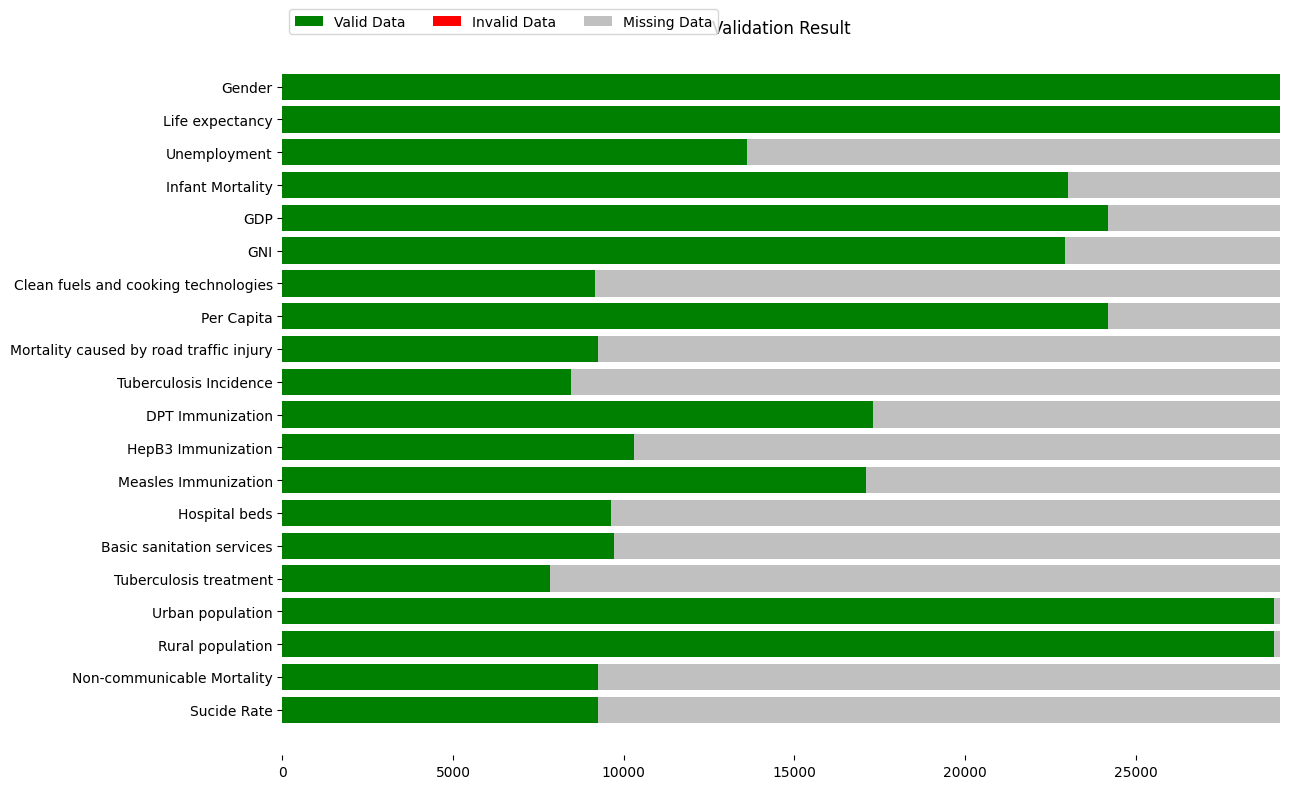

In [319]:
validateData(life_exp_data, validationObj)

Lets visualise the missing value in plot.

<Axes: >

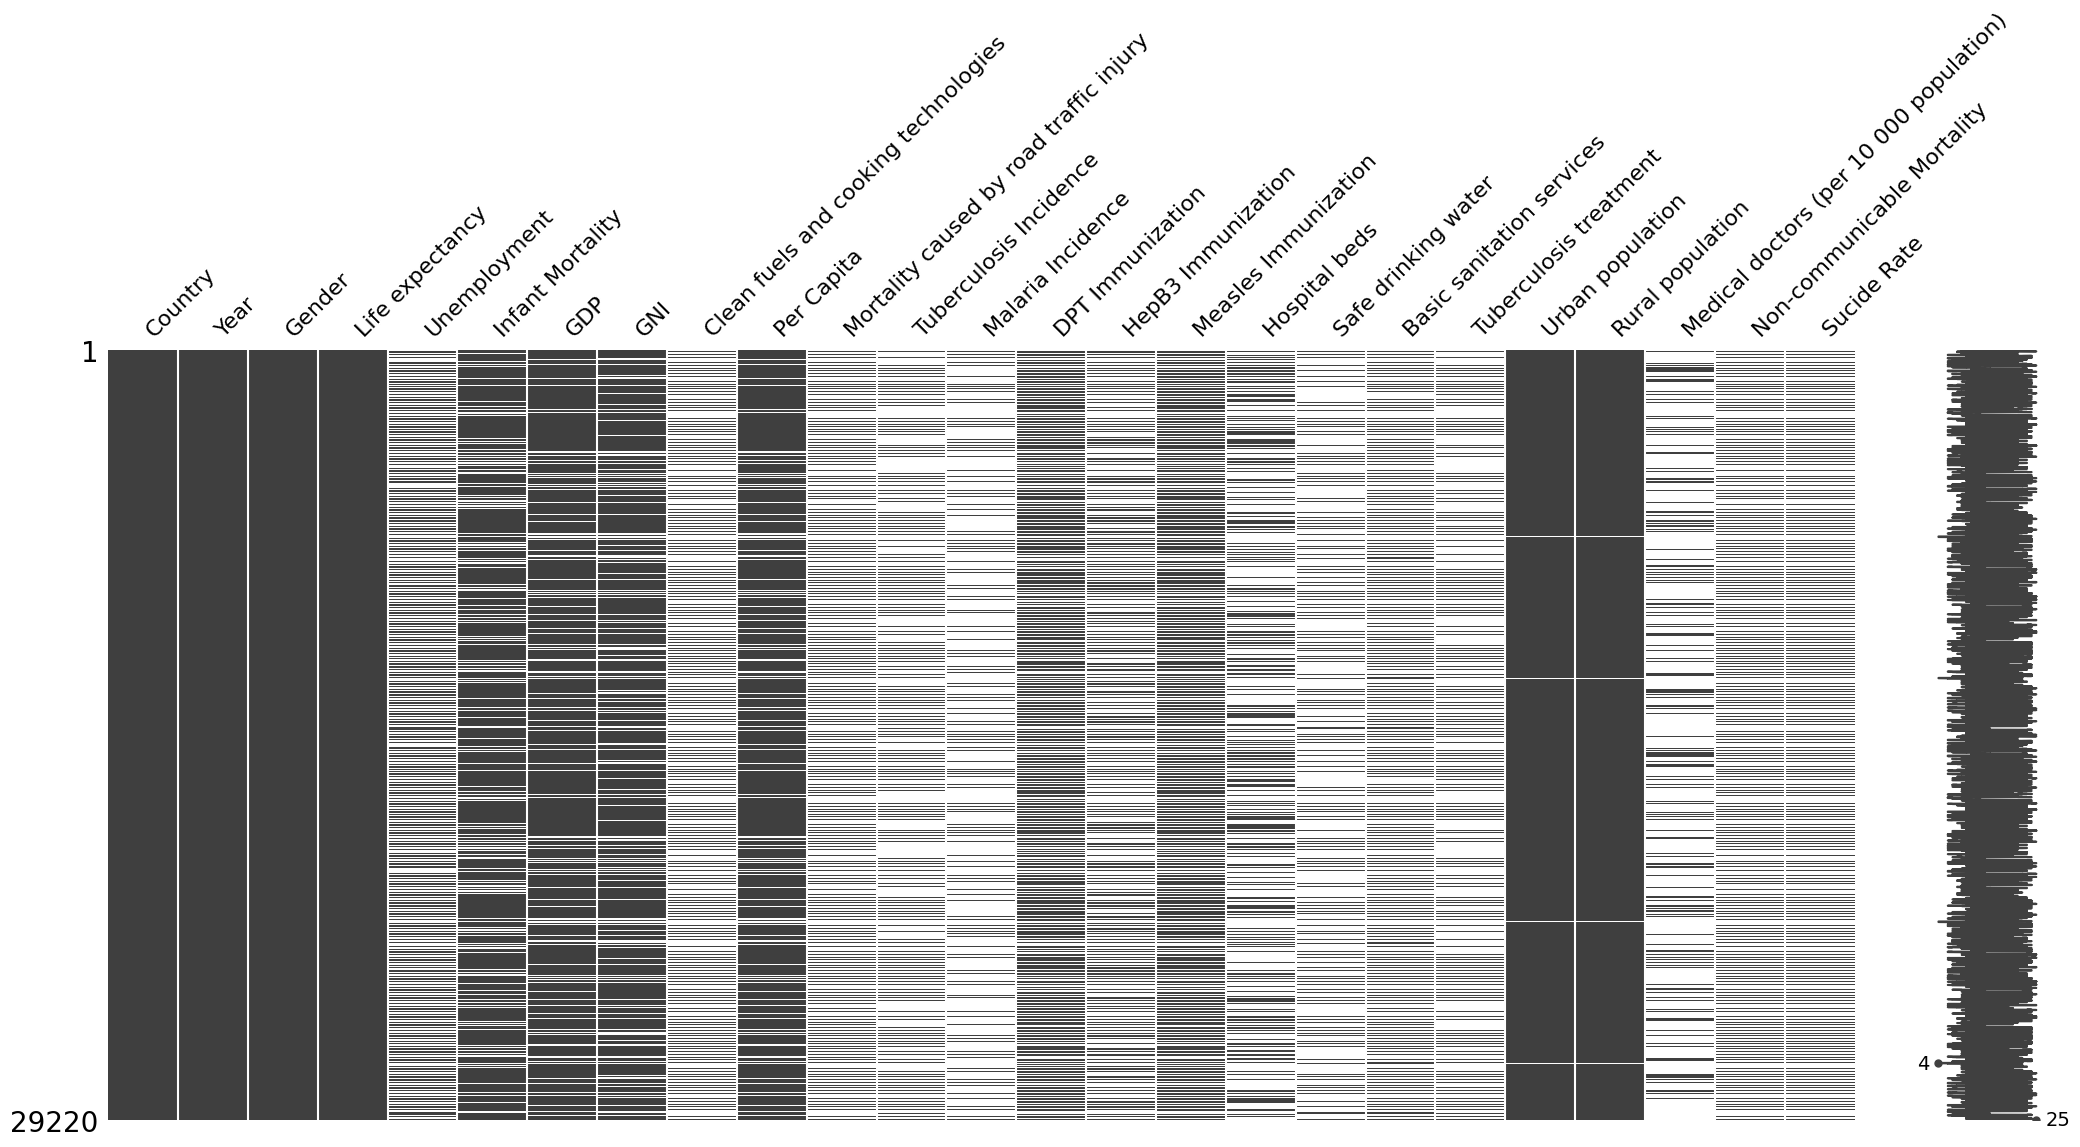

In [320]:
msno.matrix(life_exp_data)

Plot the missing value in bar graph.

<Axes: >

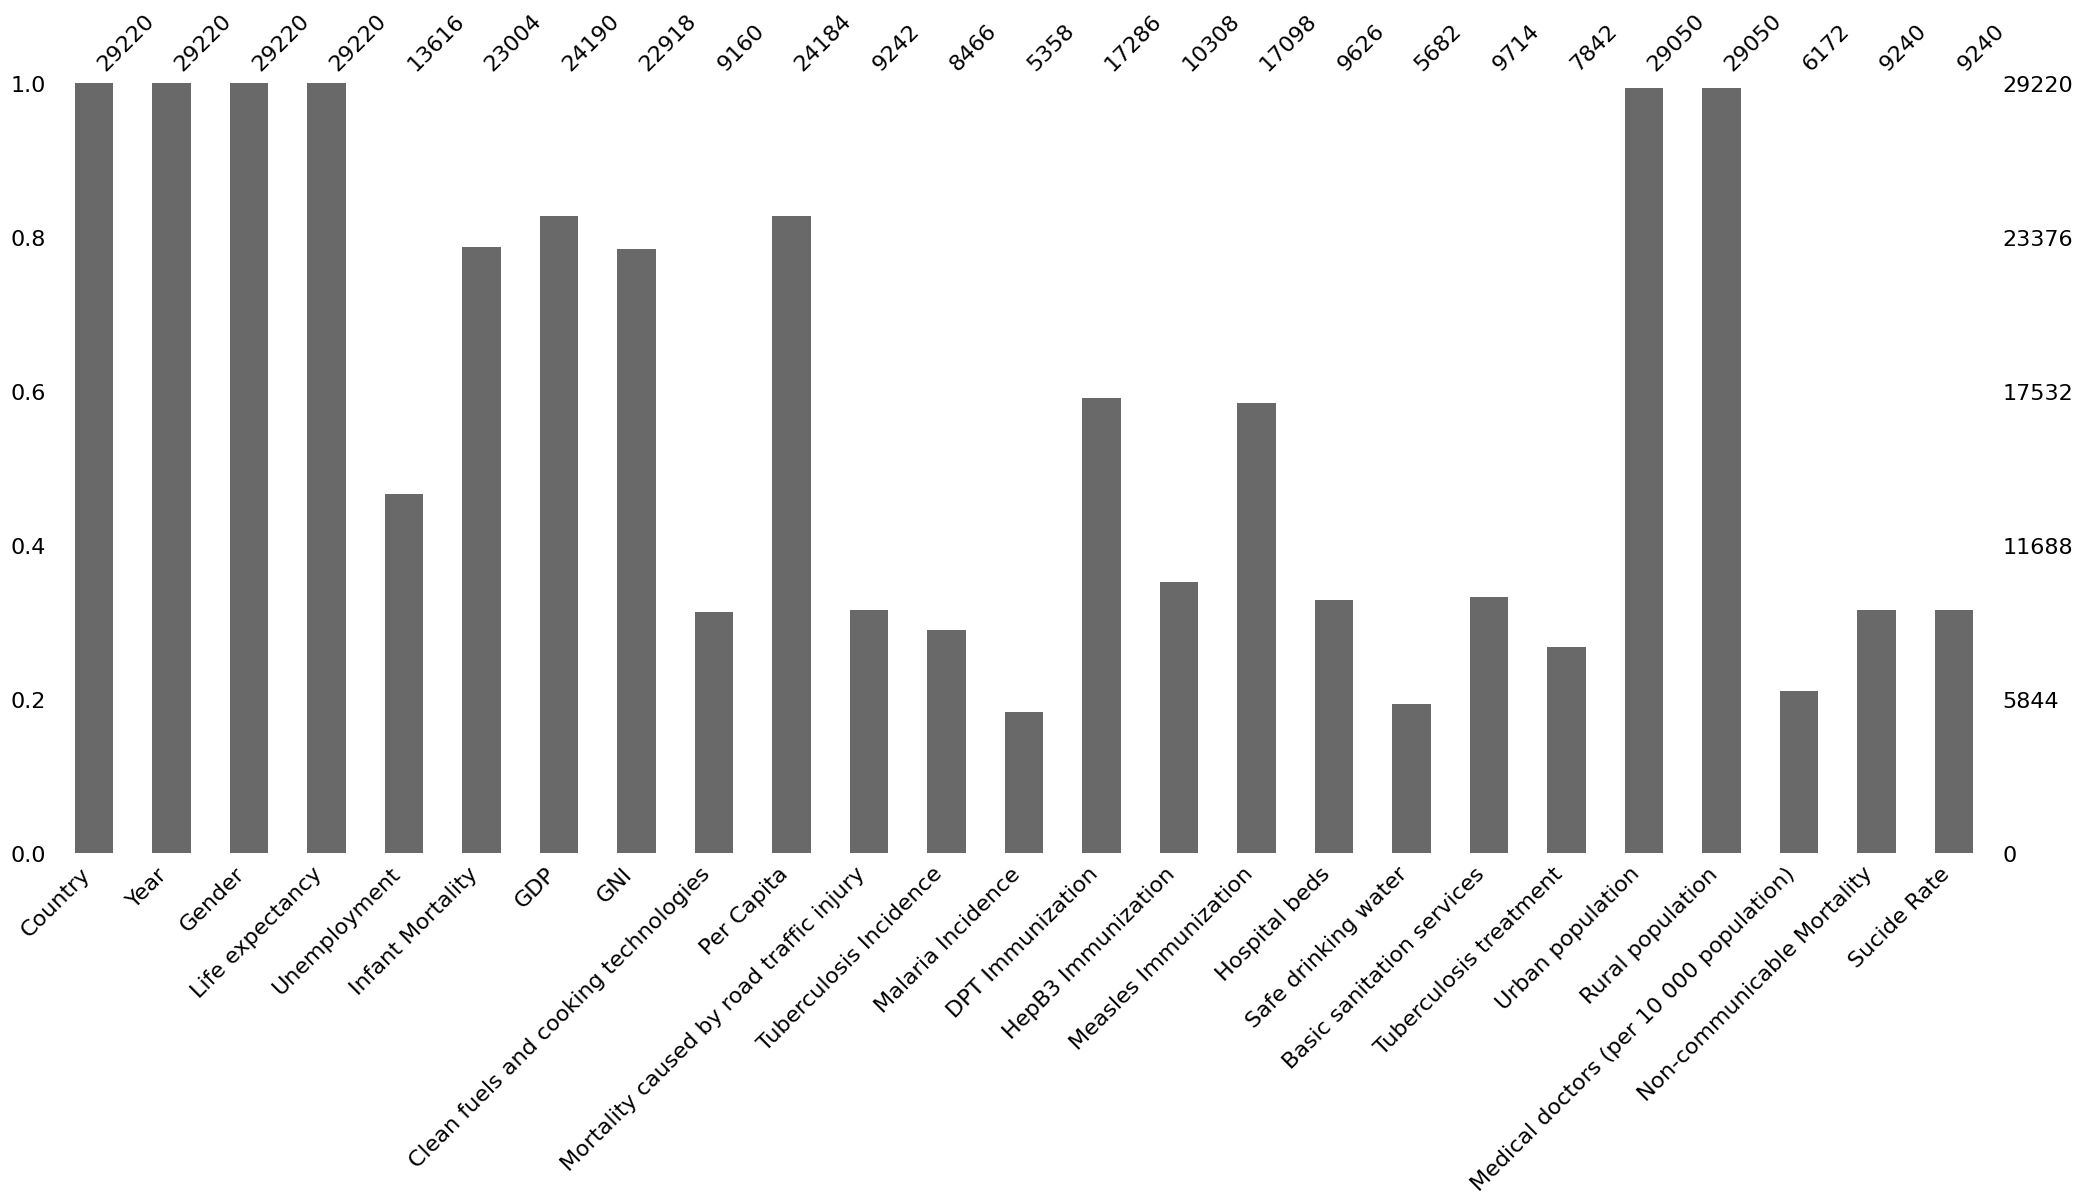

In [321]:
msno.bar(life_exp_data)

from the info wdi_data.info() we run in the beginning, we can see that most of the data are missing before 2000 AD. So, lets subset the life_exp_data between 2000 and 2019. And visualise the missing data in plot.

In [322]:
life_exp_dataSub = life_exp_data[life_exp_data['Year']>= 2000]

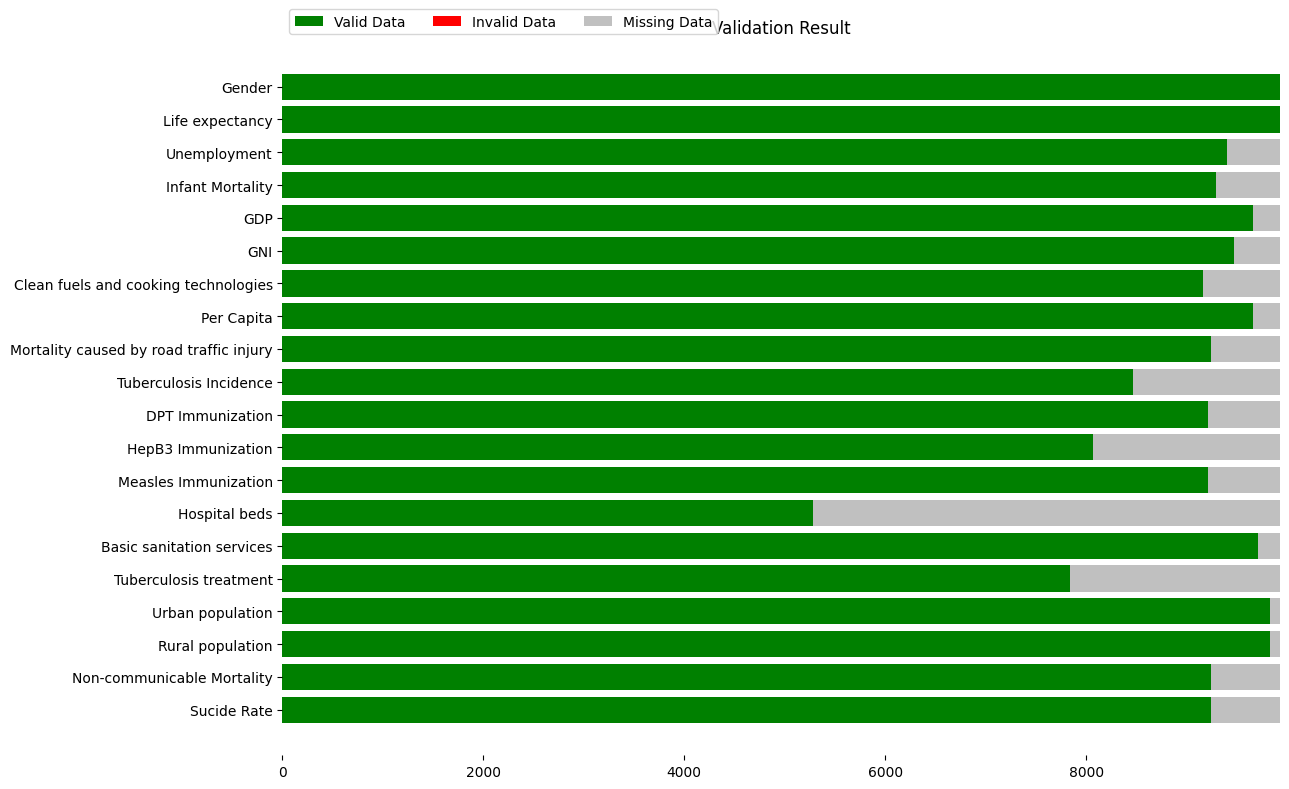

In [323]:
validateData(life_exp_dataSub, validationObj)

In [324]:
life_exp_dataSub = pd.DataFrame(life_exp_dataSub)

<Axes: >

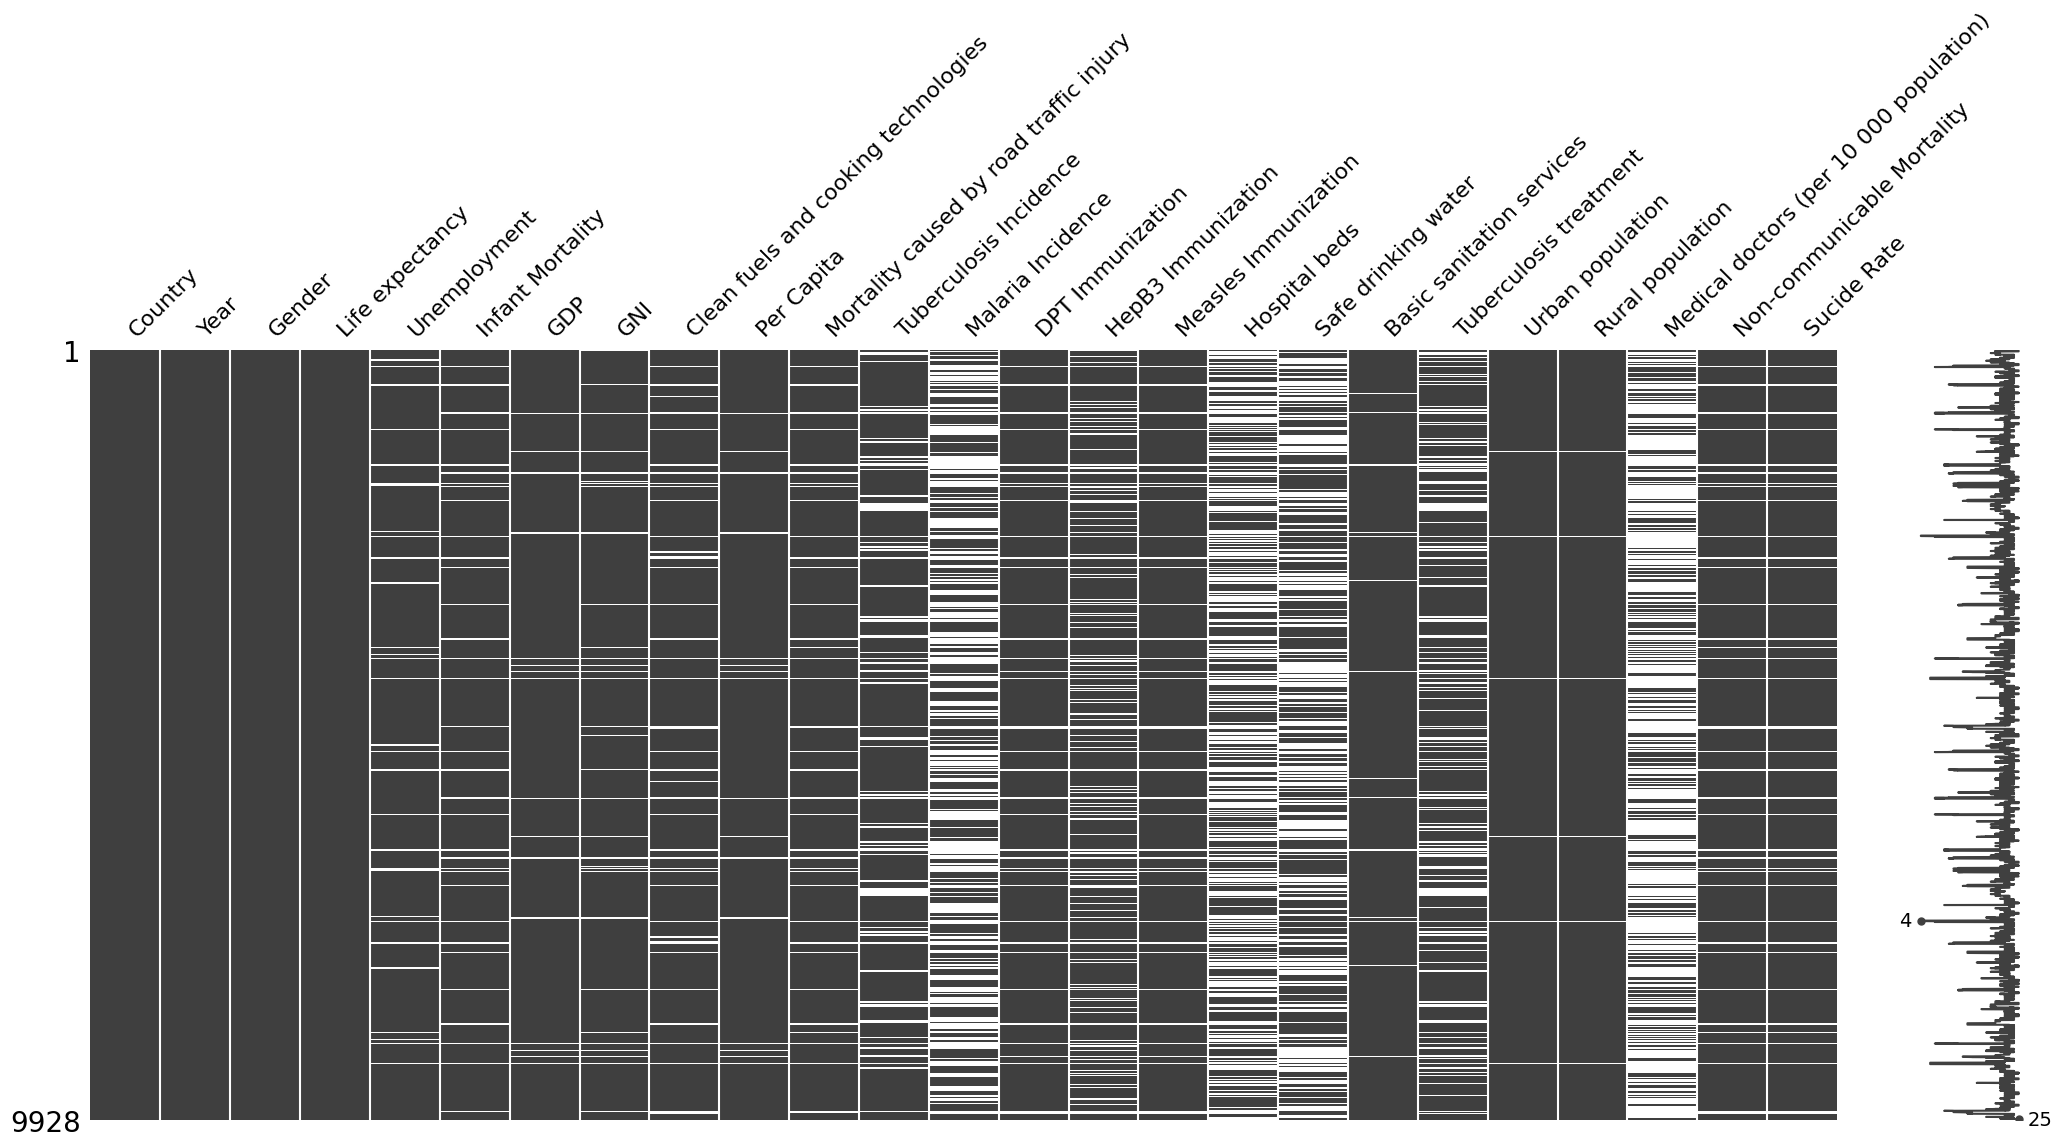

In [325]:
msno.matrix(life_exp_dataSub)

<Axes: >

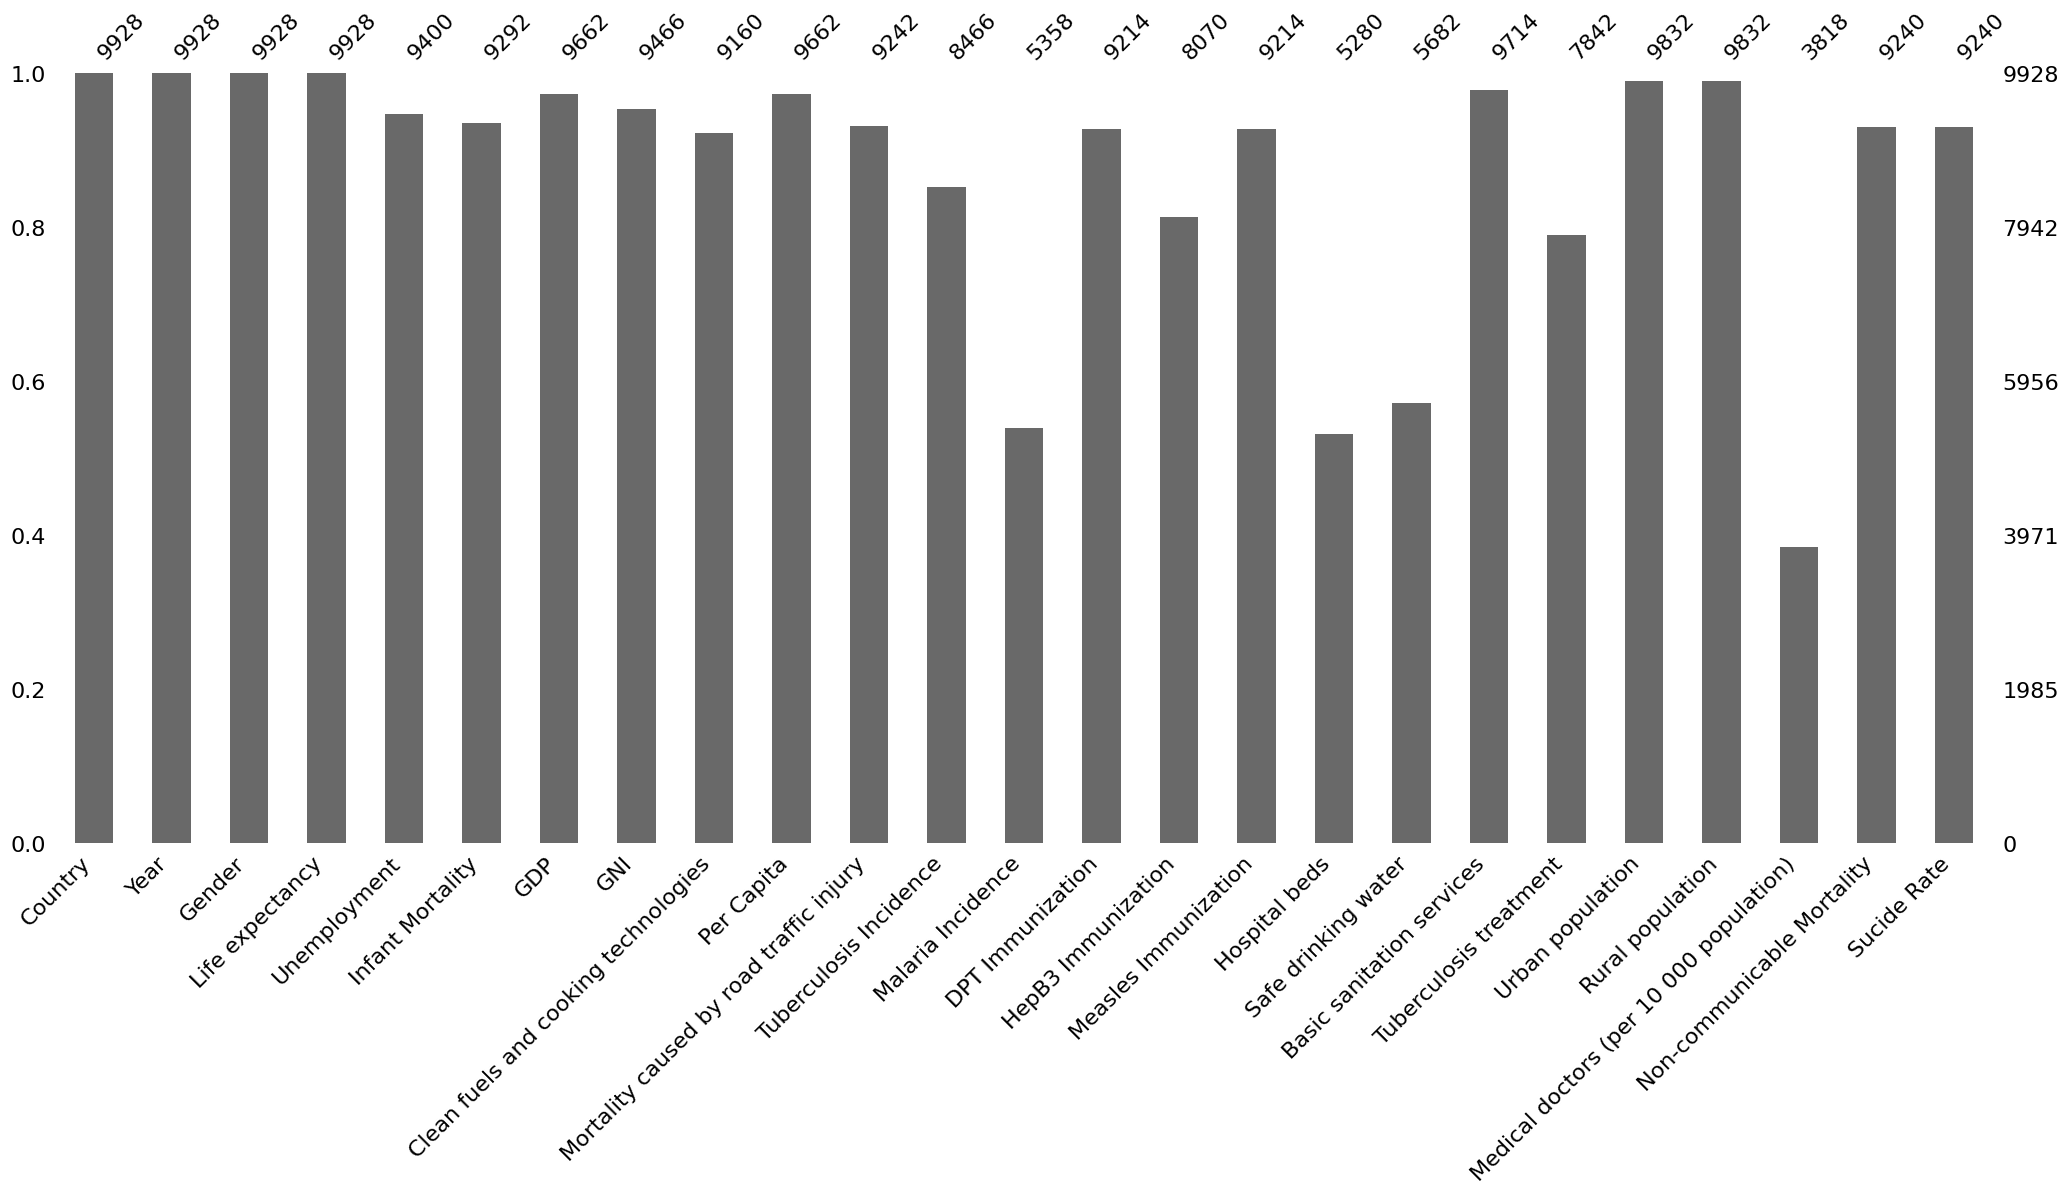

In [326]:
msno.bar(life_exp_dataSub)

From this observation we can conclude that this subset fix lots of missing values issue. Bu there are few columns which has many missing  values. Among them Medical doctors (per 10000 population) columns has more than 50% of datas are missing, So, we will try to solve this issue by imputing with mean by grouping the country.

Lets start imputing with Unemployment column.

In [327]:
colname = 'Unemployment'
printMissingValue(life_exp_dataSub[colname])

528 values are missing out of 9928 rows.


Lets impute the null value by grouping country's mean

In [328]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

Again lets print missing row count.

In [329]:
printMissingValue(life_exp_dataSub[colname])

528 values are missing out of 9928 rows.


In [330]:
def getNullCount(df, colname):
    nulldf= df[colname].isnull().groupby([df['Country']]).sum().astype(int).reset_index(name='Null Count')
    return nulldf.loc[nulldf["Null Count"]>0]

Lets view the countries which doesnot have any value.

In [331]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
6,Antigua and Barbuda,40
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
88,Greenland,36
89,Grenada,40
112,Isle of Man,2


lets view the rows for Cayman Islands

In [332]:
life_exp_dataSub.loc[life_exp_dataSub['Country'] == 'Cayman Islands']

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality,Sucide Rate
2184,Cayman Islands,2010,Female,84.7,NaN,NaN,4.156991e+09,3.934274e+09,NaN,73351.756769,...,NaN,NaN,NaN,83.654025,25.0,100.0,0.0,NaN,NaN,NaN
16794,Cayman Islands,2010,Male,79.8,NaN,NaN,4.156991e+09,3.934274e+09,NaN,73351.756769,...,NaN,NaN,NaN,83.654025,25.0,100.0,0.0,NaN,NaN,NaN


Lets impute Infant Mortality column. First of all lets see how many rows are missing in this column.

In [333]:
colname = 'Infant Mortality'
printMissingValue(life_exp_dataSub[colname])

636 values are missing out of 9928 rows.


There are 636 missing value out of 9928 rows. So, lets try imputing with mean.

In [334]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

Lets view how many rows are still missing.

In [335]:
printMissingValue(life_exp_dataSub[colname])

636 values are missing out of 9928 rows.


In [336]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [337]:
colname = 'GDP'
printMissingValue(life_exp_dataSub[colname])

266 values are missing out of 9928 rows.


In [338]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [339]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [340]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
121,"Korea, Dem. People's Rep.",40
219,St. Martin (French part),40


In [341]:
colname = 'GNI'
printMissingValue(life_exp_dataSub[colname])

462 values are missing out of 9928 rows.


In [342]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [343]:
printMissingValue(life_exp_dataSub[colname])

162 values are missing out of 9928 rows.


In [344]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
90,Guam,40
121,"Korea, Dem. People's Rep.",40
197,San Marino,2
219,St. Martin (French part),40
250,Virgin Islands (U.S.),40


In [345]:
colname = 'Clean fuels and cooking technologies'
printMissingValue(life_exp_dataSub[colname])

768 values are missing out of 9928 rows.


In [346]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [347]:
printMissingValue(life_exp_dataSub[colname])

756 values are missing out of 9928 rows.


In [348]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [349]:
colname = 'Per Capita'
printMissingValue(life_exp_dataSub[colname])

266 values are missing out of 9928 rows.


In [350]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [351]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [352]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
121,"Korea, Dem. People's Rep.",40
219,St. Martin (French part),40


In [353]:
colname = 'Mortality caused by road traffic injury'
printMissingValue(life_exp_dataSub[colname])

686 values are missing out of 9928 rows.


In [354]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [355]:
printMissingValue(life_exp_dataSub[colname])

648 values are missing out of 9928 rows.


In [356]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40


In [357]:
colname = 'Tuberculosis Incidence'
printMissingValue(life_exp_dataSub[colname])

1462 values are missing out of 9928 rows.


In [358]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [359]:
printMissingValue(life_exp_dataSub[colname])

1402 values are missing out of 9928 rows.


In [360]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
2,Africa Western and Central,40
7,Arab World,40
36,Caribbean small states,40
39,Central Europe and the Baltics,40
41,Channel Islands,40
59,Early-demographic dividend,40
61,East Asia & Pacific (IDA & IBRD countries),40
71,Euro area,40
73,Europe & Central Asia (IDA & IBRD countries),40


In [361]:
colname = 'Malaria Incidence'
printMissingValue(life_exp_dataSub[colname])

4570 values are missing out of 9928 rows.


In [362]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [363]:
printMissingValue(life_exp_dataSub[colname])

4288 values are missing out of 9928 rows.


In [364]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
3,Albania,40
6,Antigua and Barbuda,40
10,Aruba,40
11,Australia,40
12,Austria,40
...,...,...
242,United Kingdom,40
243,United States,40
245,Uruguay,40
250,Virgin Islands (U.S.),40


In [365]:
colname = 'DPT Immunization'
printMissingValue(life_exp_dataSub[colname])

714 values are missing out of 9928 rows.


In [366]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [367]:
printMissingValue(life_exp_dataSub[colname])

676 values are missing out of 9928 rows.


In [368]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [369]:
colname = 'HepB3 Immunization'
printMissingValue(life_exp_dataSub[colname])

1858 values are missing out of 9928 rows.


In [370]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [371]:
printMissingValue(life_exp_dataSub[colname])

878 values are missing out of 9928 rows.


In [372]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
55,Denmark,40
57,Dominica,2
76,Faroe Islands,40
78,Finland,40
81,French Polynesia,40


In [373]:
colname = 'Measles Immunization'
printMissingValue(life_exp_dataSub[colname])

714 values are missing out of 9928 rows.


In [374]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [375]:
printMissingValue(life_exp_dataSub[colname])

676 values are missing out of 9928 rows.


In [376]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [377]:
colname = 'Hospital beds'
printMissingValue(life_exp_dataSub[colname])

4648 values are missing out of 9928 rows.


In [378]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [379]:
printMissingValue(life_exp_dataSub[colname])

1202 values are missing out of 9928 rows.


In [380]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
2,Africa Western and Central,40
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
79,Fragile and conflict affected situations,40
81,French Polynesia,40
88,Greenland,36


In [381]:
colname = 'Safe drinking water'
printMissingValue(life_exp_dataSub[colname])

4246 values are missing out of 9928 rows.


In [382]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [383]:
printMissingValue(life_exp_dataSub[colname])

4126 values are missing out of 9928 rows.


In [384]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
5,Angola,40
6,Antigua and Barbuda,40
7,Arab World,40
8,Argentina,40
...,...,...
247,Vanuatu,40
248,"Venezuela, RB",40
249,Vietnam,40
253,"Yemen, Rep.",40


In [385]:
colname = 'Basic sanitation services'
printMissingValue(life_exp_dataSub[colname])

214 values are missing out of 9928 rows.


In [386]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [387]:
printMissingValue(life_exp_dataSub[colname])

44 values are missing out of 9928 rows.


In [388]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
112,Isle of Man,2
123,Kosovo,40
150,Marshall Islands,2


In [389]:
colname = 'Tuberculosis treatment'
printMissingValue(life_exp_dataSub[colname])

2086 values are missing out of 9928 rows.


In [390]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [391]:
printMissingValue(life_exp_dataSub[colname])

1406 values are missing out of 9928 rows.


In [392]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
2,Africa Western and Central,40
7,Arab World,40
36,Caribbean small states,40
39,Central Europe and the Baltics,40
41,Channel Islands,40
57,Dominica,2
59,Early-demographic dividend,40
61,East Asia & Pacific (IDA & IBRD countries),40
71,Euro area,40


In [393]:
colname = 'Urban population'
printMissingValue(life_exp_dataSub[colname])

96 values are missing out of 9928 rows.


In [394]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [395]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [396]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
123,Kosovo,40
219,St. Martin (French part),40


In [397]:
colname = 'Rural population'
printMissingValue(life_exp_dataSub[colname])

96 values are missing out of 9928 rows.


In [398]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [399]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [400]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
123,Kosovo,40
219,St. Martin (French part),40


In [401]:
colname = 'Medical doctors (per 10 000 population)'
printMissingValue(life_exp_dataSub[colname])

6110 values are missing out of 9928 rows.


In [402]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [403]:
printMissingValue(life_exp_dataSub[colname])

3566 values are missing out of 9928 rows.


In [404]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
2,Africa Western and Central,40
7,Arab World,40
10,Aruba,40
14,"Bahamas, The",40
...,...,...
249,Vietnam,40
250,Virgin Islands (U.S.),40
251,West Bank and Gaza,40
252,World,40


In [405]:
colname = 'Non-communicable Mortality'
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [406]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [407]:
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [408]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40


In [409]:
colname = 'Sucide Rate'
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [410]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [411]:
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [412]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40


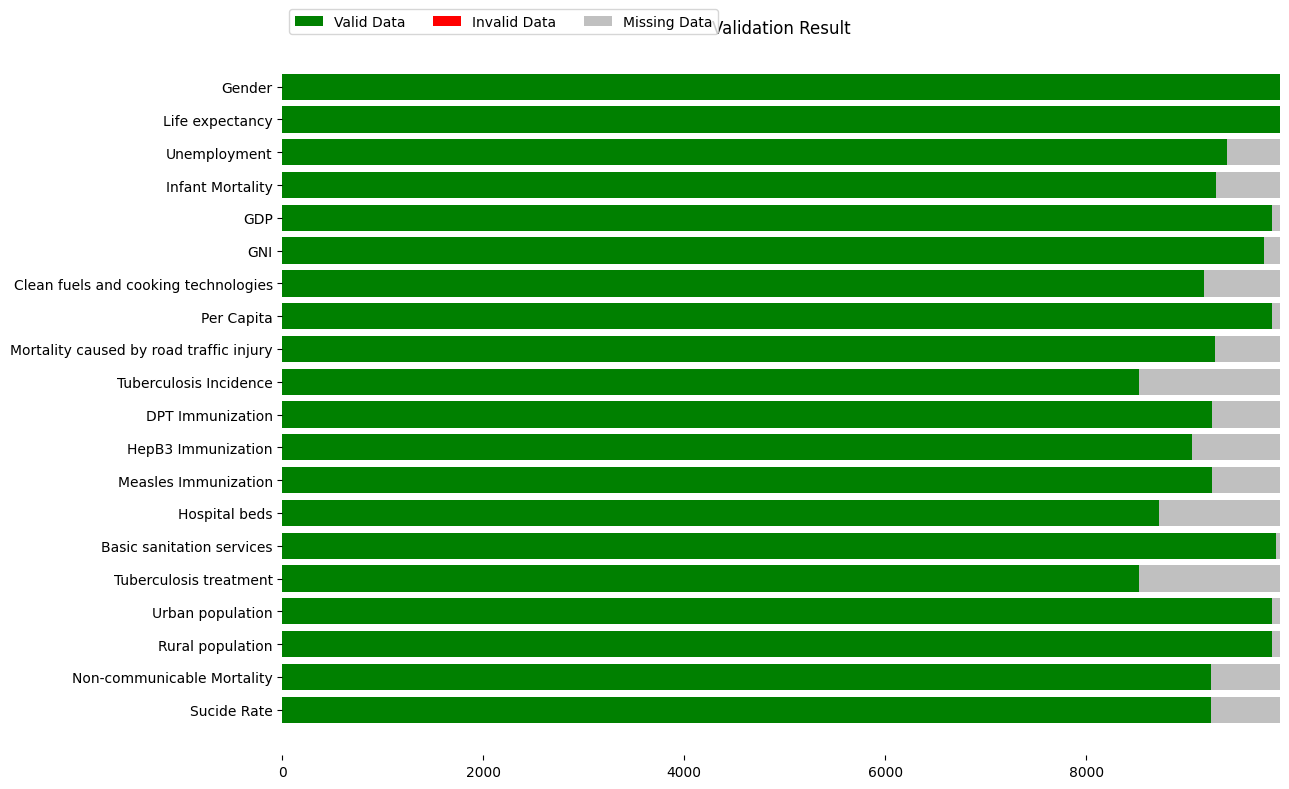

In [413]:
validateData(life_exp_dataSub, validationObj)

<Axes: >

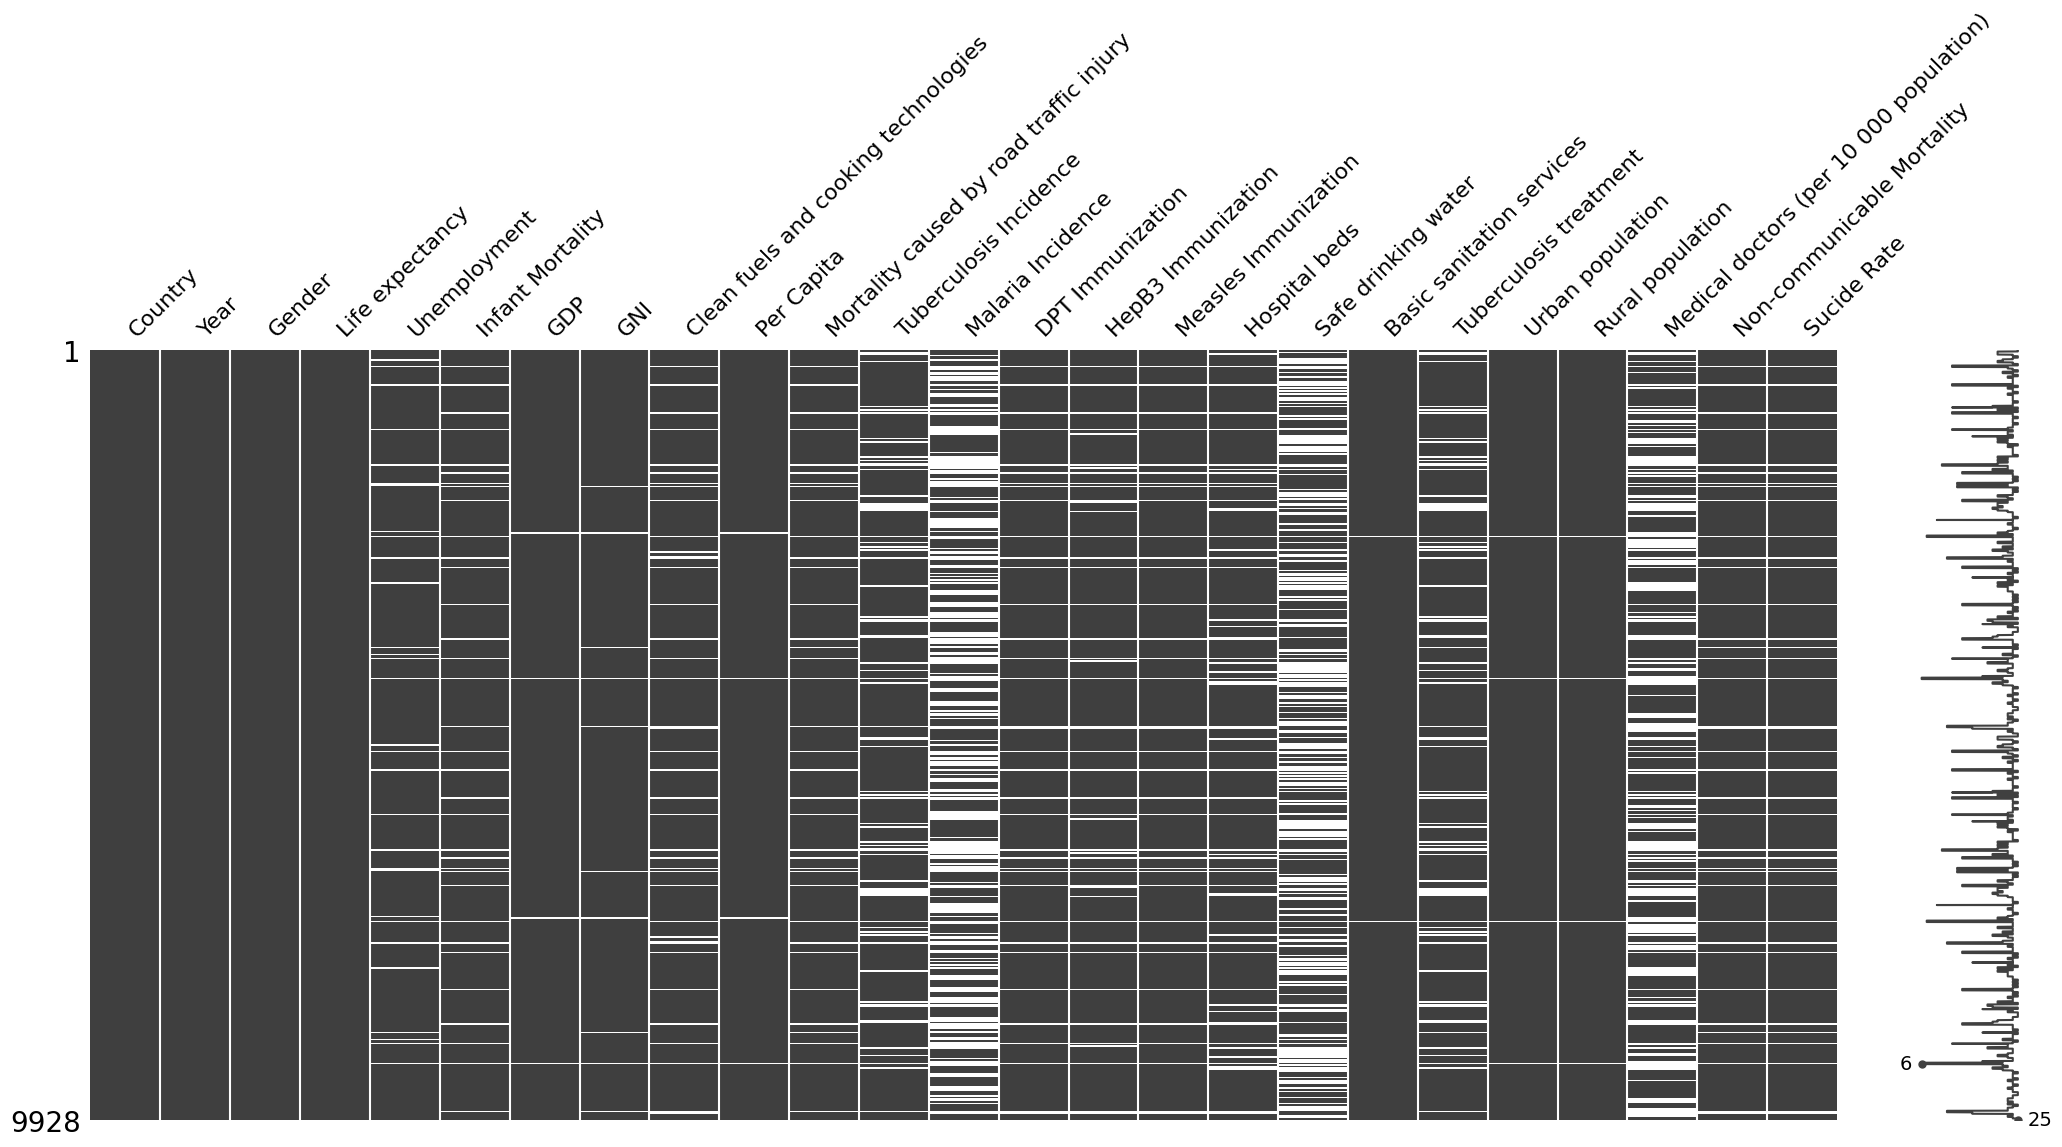

In [414]:
msno.matrix(life_exp_dataSub)

<Axes: >

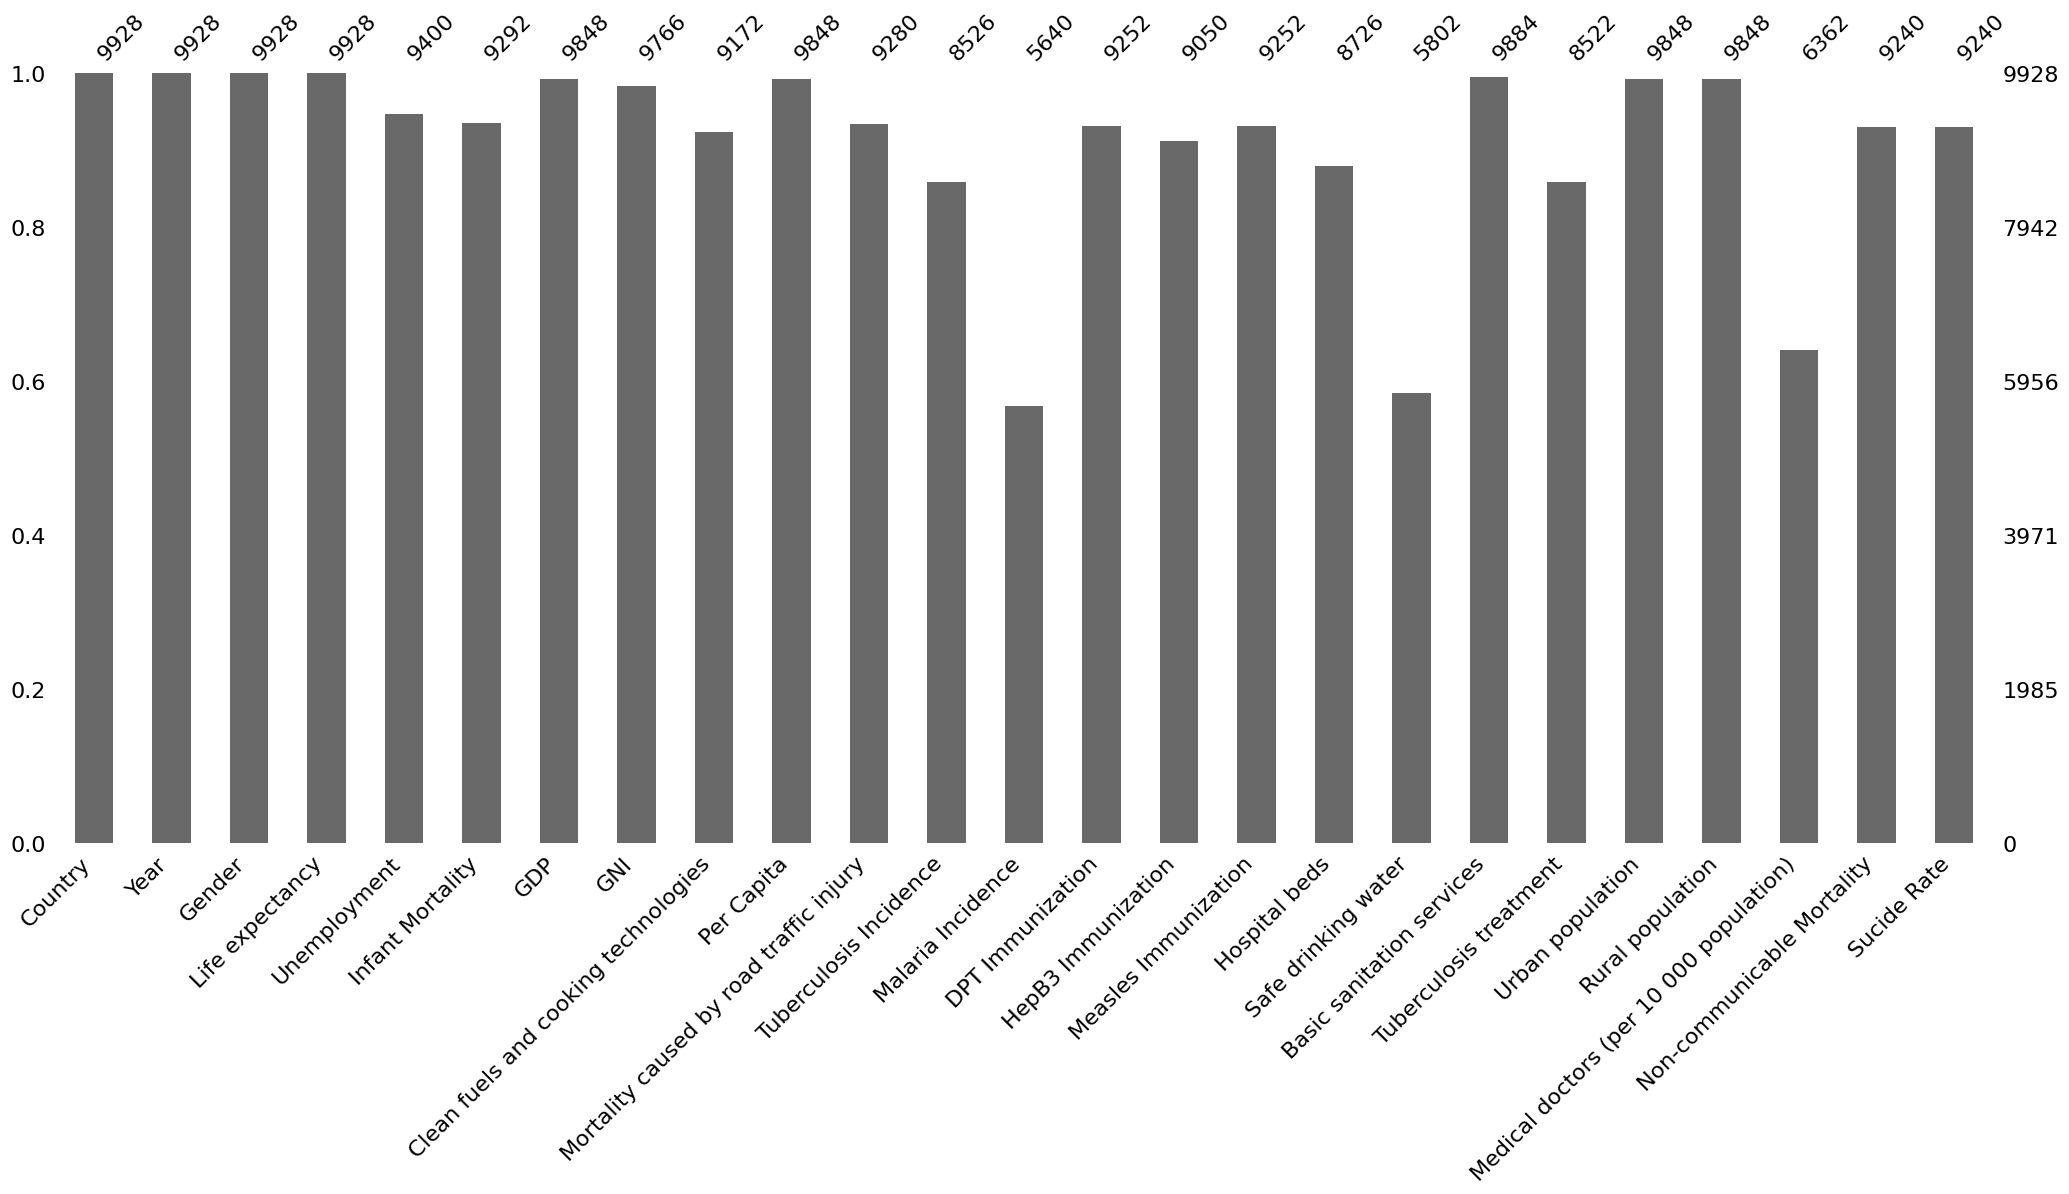

In [415]:
msno.bar(life_exp_dataSub)

In [416]:
checkMissingValue(life_exp_dataSub)

Total rows: 9928

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Life expectancy
Missing values: 528 	 Column Name: Unemployment
Missing values: 636 	 Column Name: Infant Mortality
Missing values: 80 	 Column Name: GDP
Missing values: 162 	 Column Name: GNI
Missing values: 756 	 Column Name: Clean fuels and cooking technologies
Missing values: 80 	 Column Name: Per Capita
Missing values: 648 	 Column Name: Mortality caused by road traffic injury
Missing values: 1402 	 Column Name: Tuberculosis Incidence
Missing values: 4288 	 Column Name: Malaria Incidence
Missing values: 676 	 Column Name: DPT Immunization
Missing values: 878 	 Column Name: HepB3 Immunization
Missing values: 676 	 Column Name: Measles Immunization
Missing values: 1202 	 Column Name: Hospital beds
Missing values: 4126 	 Column Name: Safe drinking water
Missing values: 44 	 Column Name: Basic sanitation services
Miss

After imputing the value there are some attributes which has high number of missing value so I think its good idea to drop these columns for better prediction.

In [417]:
life_exp_dataSub.drop(['Malaria Incidence', 'Safe drinking water', 'Medical doctors (per 10 000 population)'], axis=1, inplace=True)

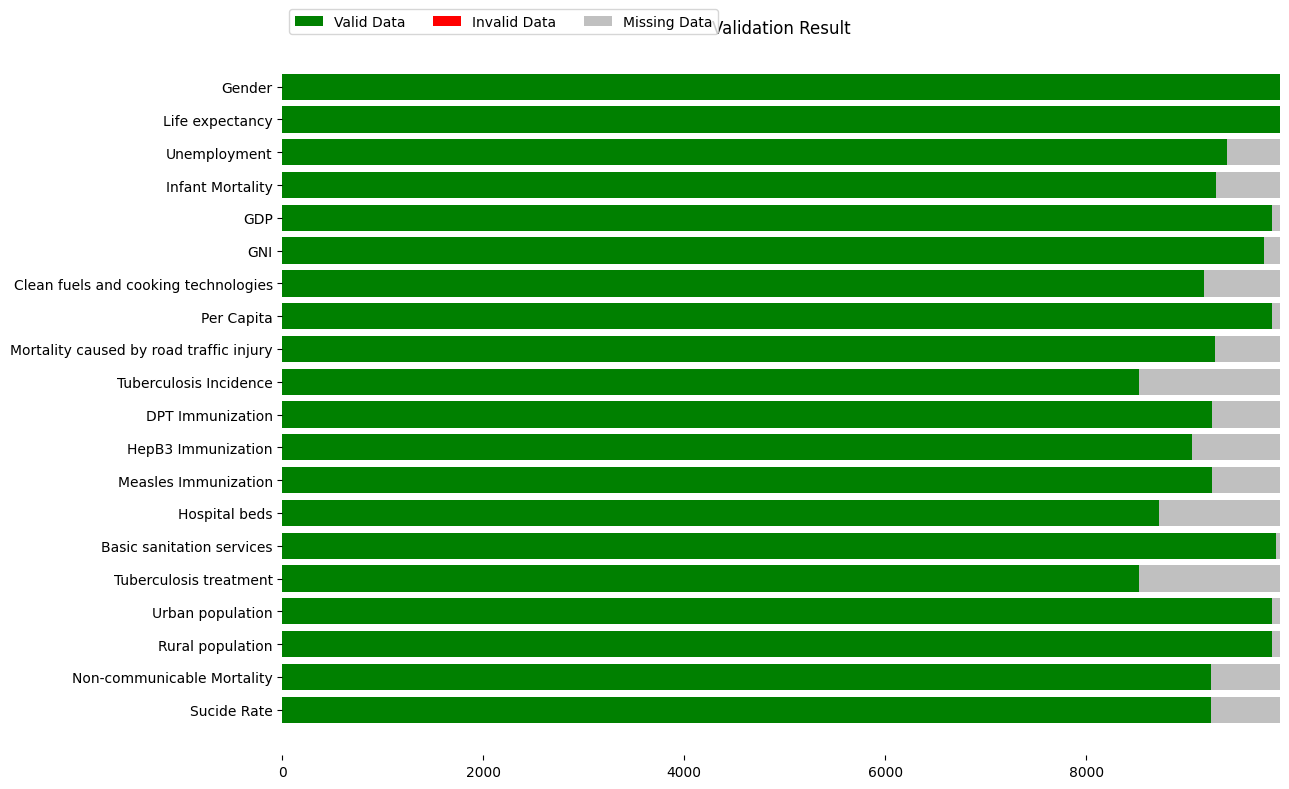

In [418]:
validateData(life_exp_dataSub, validationObj)

<Axes: >

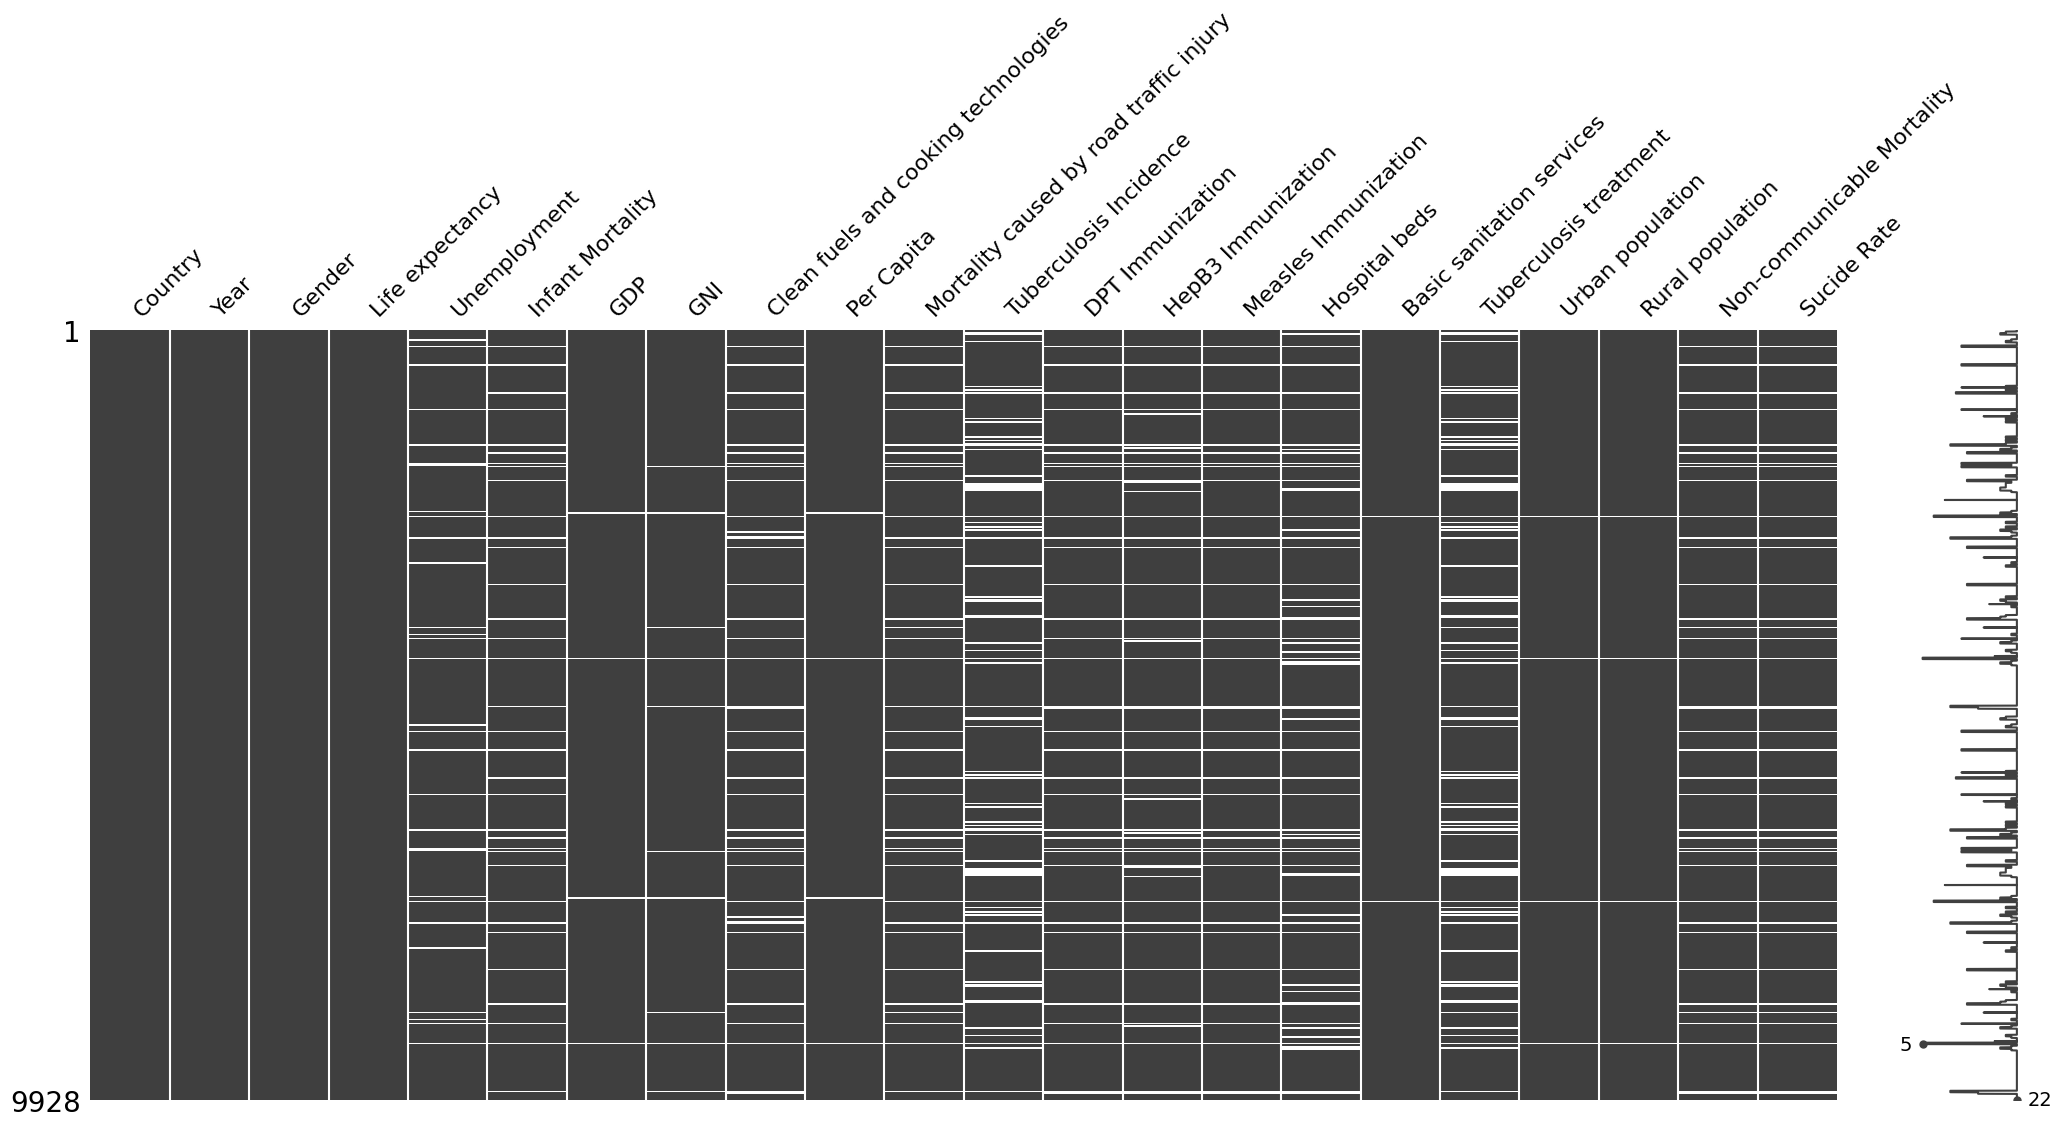

In [419]:
msno.matrix(life_exp_dataSub)

<Axes: >

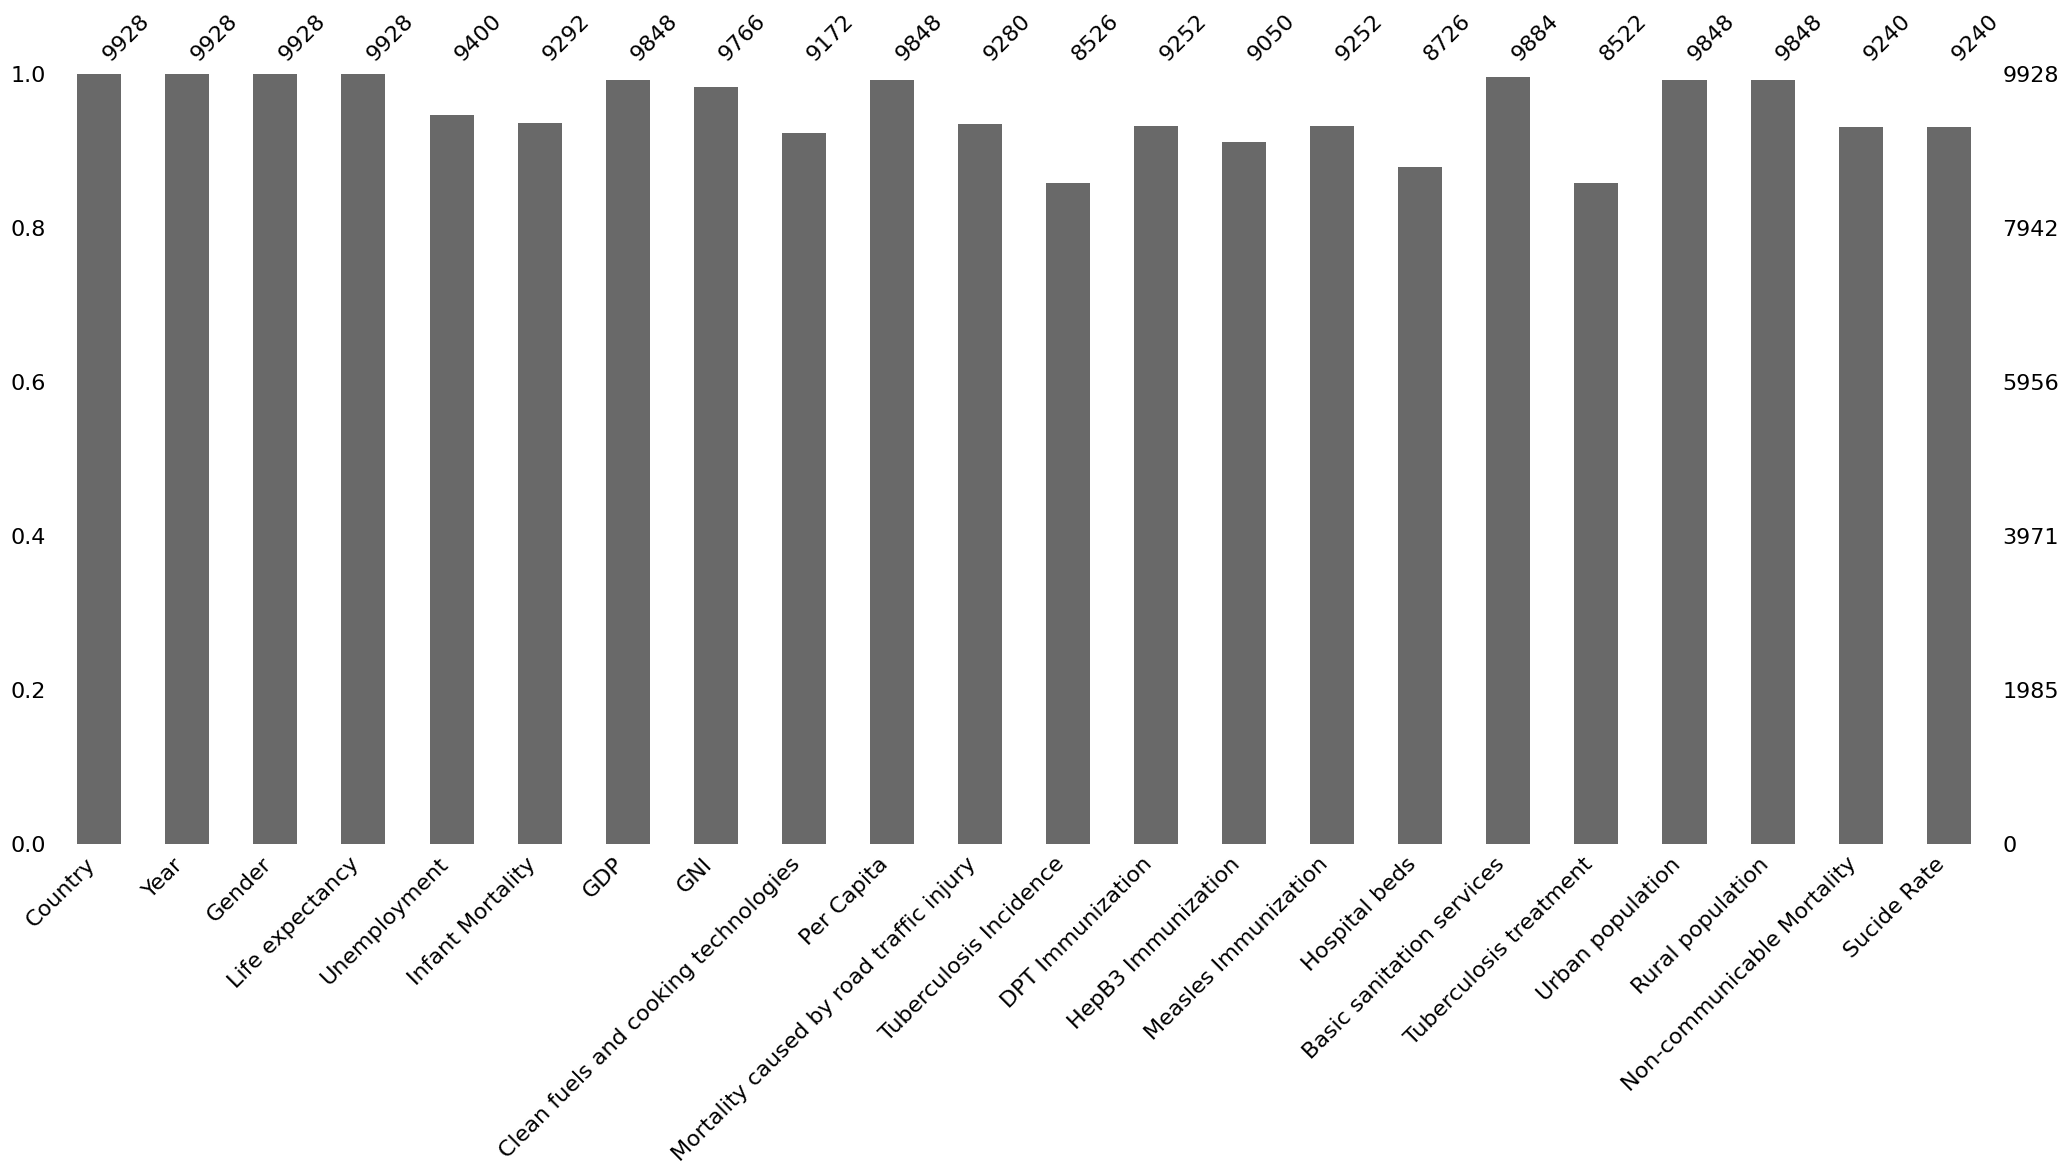

In [420]:
msno.bar(life_exp_dataSub)

In [421]:
#life_exp_dataSub.fillna(life_exp_dataSub.mean(numeric_only=True), inplace=True)

for col in life_exp_dataSub.columns[life_exp_dataSub.isnull().any(axis=0)]:
        life_exp_dataSub[col].fillna(life_exp_dataSub[col].mean(),inplace=True)

C:\Users\Sakshi Kumari\AppData\Local\Temp\ipykernel_12112\3658046241.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_exp_dataSub[col].fillna(life_exp_dataSub[col].mean(),inplace=True)


In [422]:
checkMissingValue(life_exp_dataSub)

Total rows: 9928

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Life expectancy
Missing values: 0 	 Column Name: Unemployment
Missing values: 0 	 Column Name: Infant Mortality
Missing values: 0 	 Column Name: GDP
Missing values: 0 	 Column Name: GNI
Missing values: 0 	 Column Name: Clean fuels and cooking technologies
Missing values: 0 	 Column Name: Per Capita
Missing values: 0 	 Column Name: Mortality caused by road traffic injury
Missing values: 0 	 Column Name: Tuberculosis Incidence
Missing values: 0 	 Column Name: DPT Immunization
Missing values: 0 	 Column Name: HepB3 Immunization
Missing values: 0 	 Column Name: Measles Immunization
Missing values: 0 	 Column Name: Hospital beds
Missing values: 0 	 Column Name: Basic sanitation services
Missing values: 0 	 Column Name: Tuberculosis treatment
Missing values: 0 	 Column Name: Urban population
Missing values: 0 	 Column Name: 

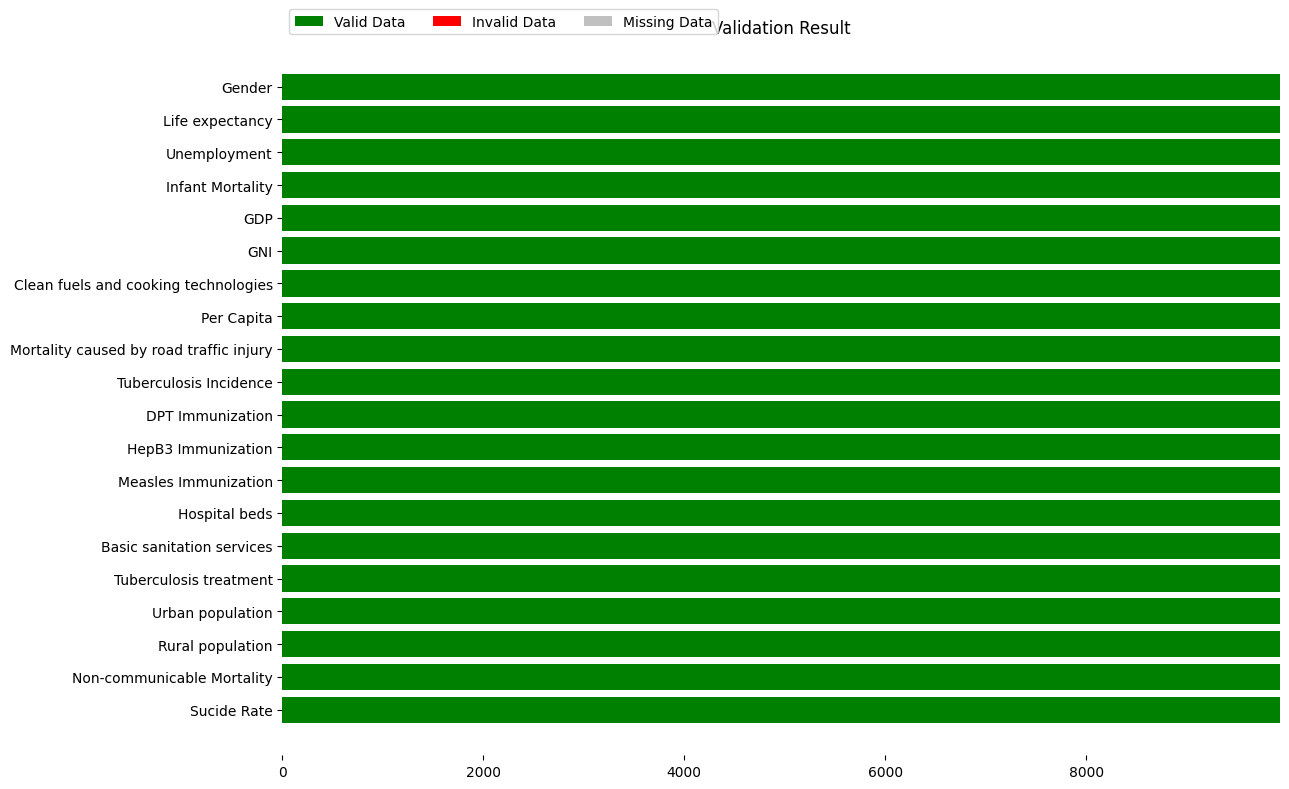

In [423]:
validateData(life_exp_dataSub, validationObj)

<Axes: >

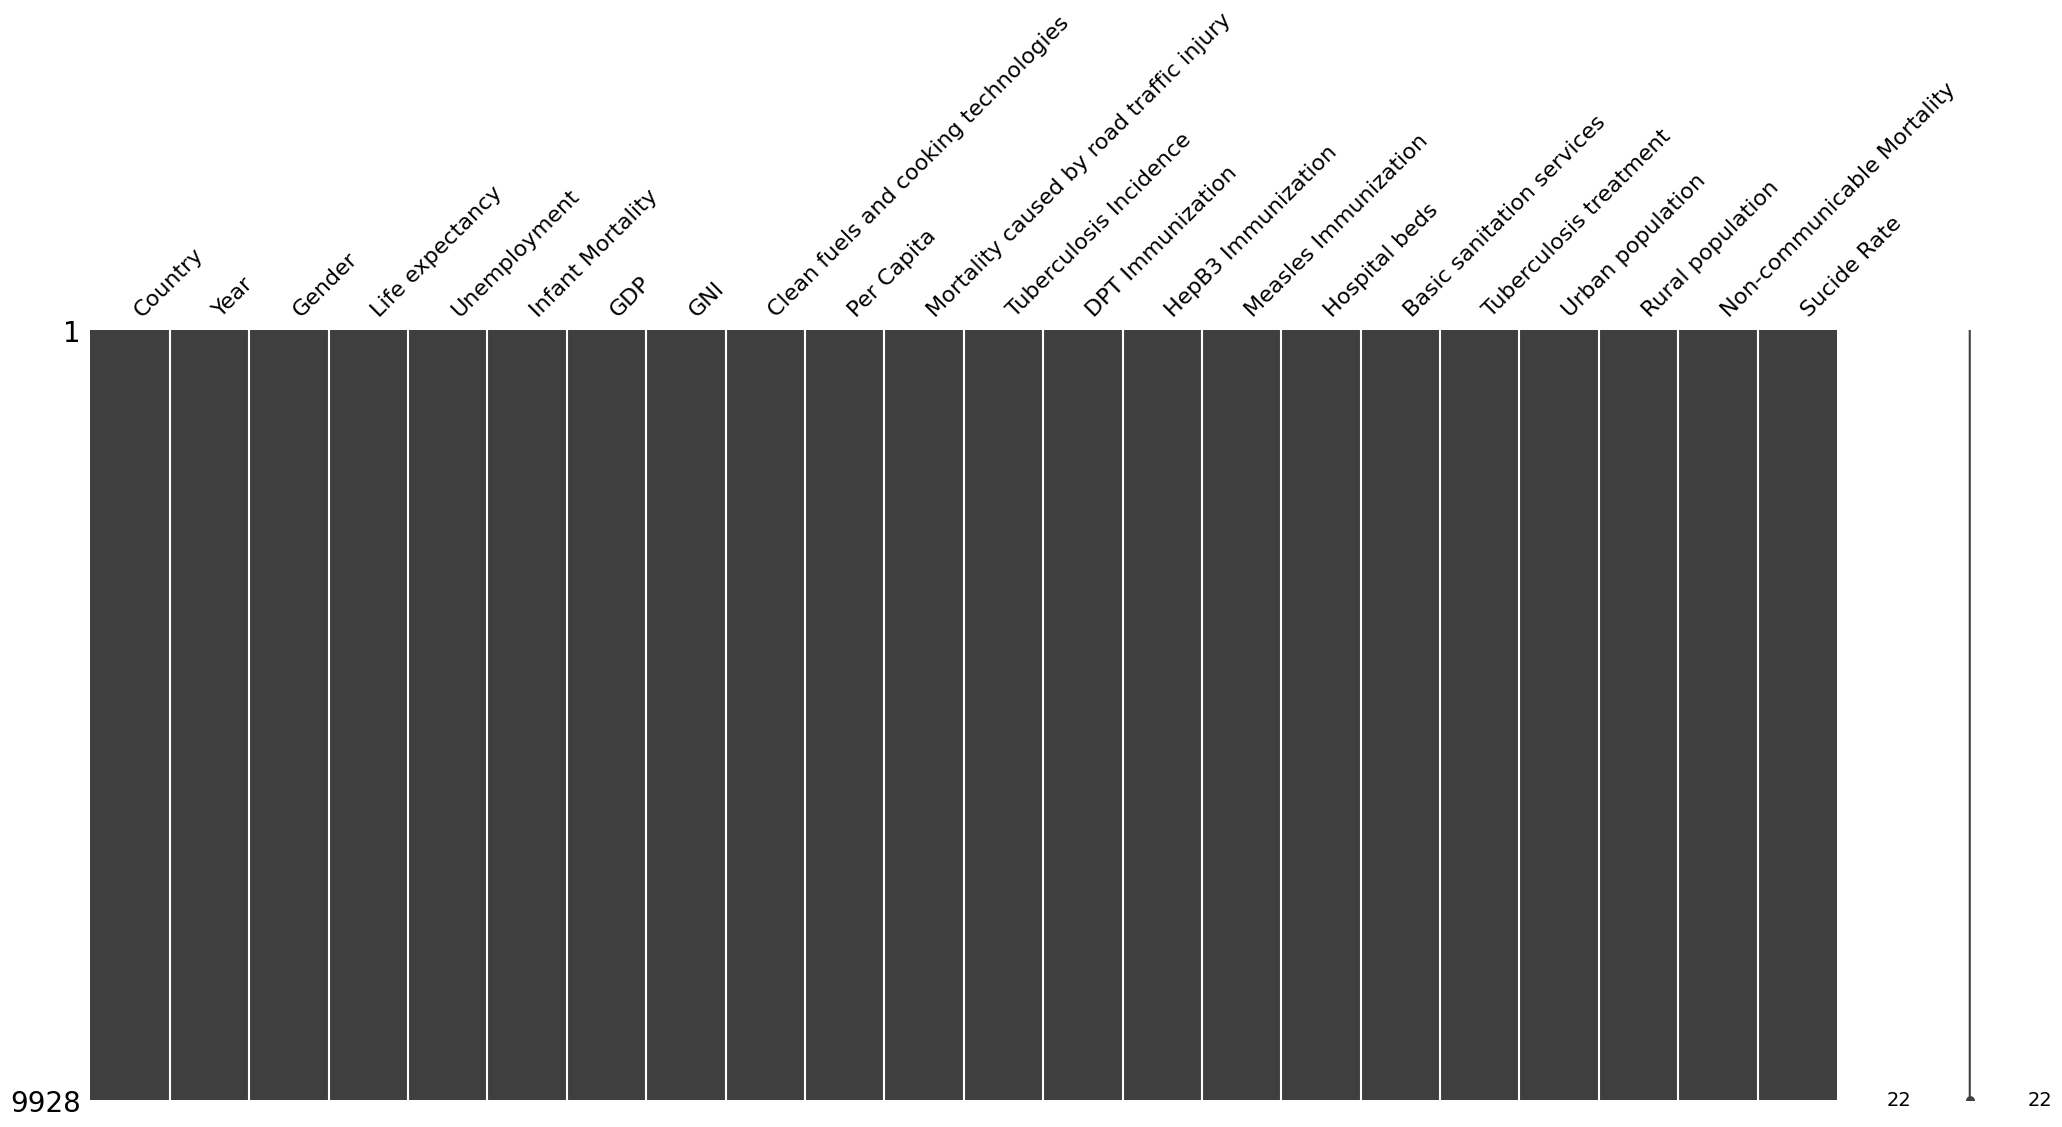

In [424]:
msno.matrix(life_exp_dataSub)

<Axes: >

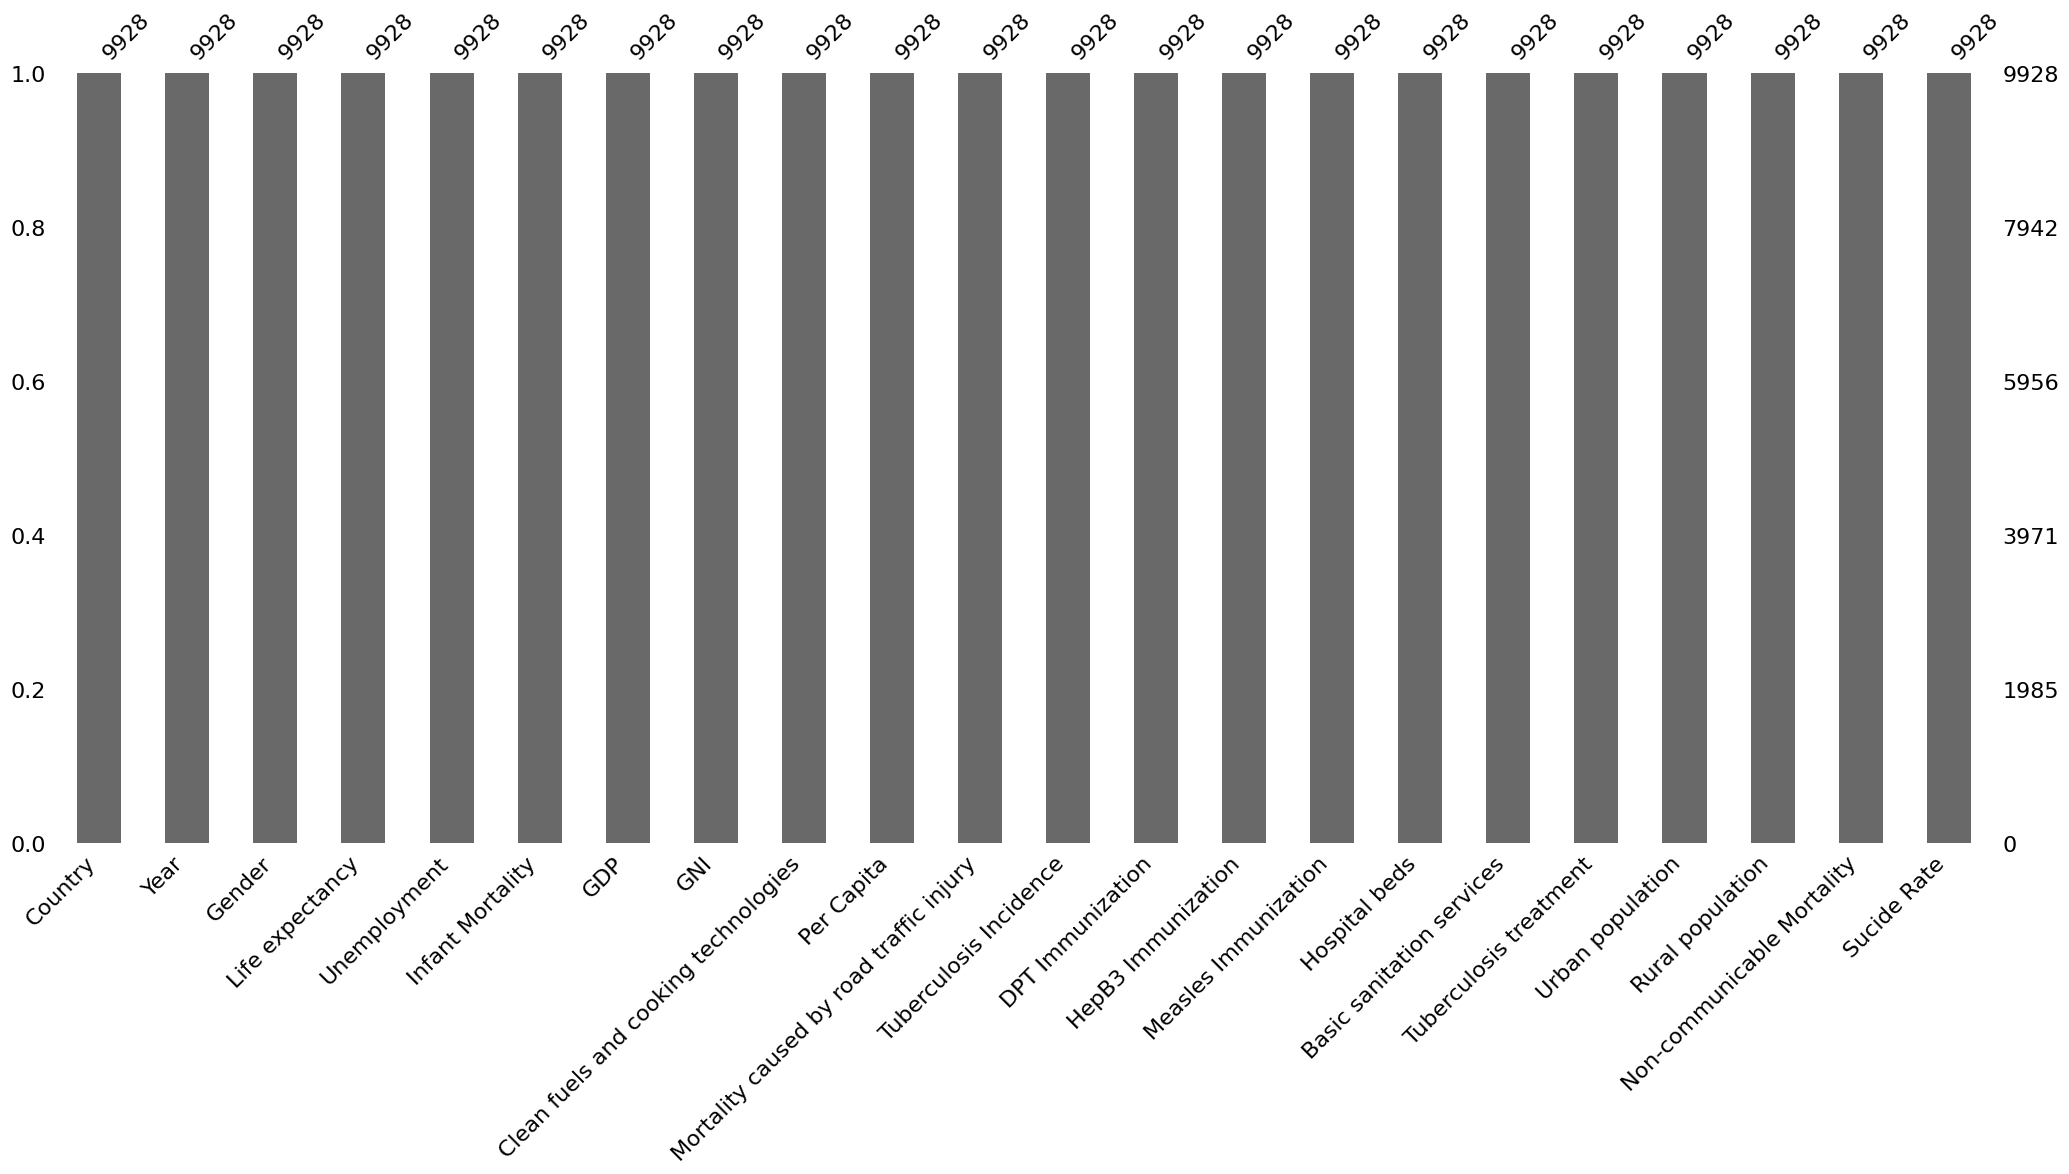

In [425]:
msno.bar(life_exp_dataSub)

In [426]:
#life_exp_dataSub.drop(['Country', 'Year'], axis=1, inplace=True)

In [427]:
life_exp_dataSub.head()

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
40,Afghanistan,2000,Female,57.120,13.846,85.0,1.368449e+10,1.824044e+10,6.4,434.739537,...,24.0,65.076923,27.0,0.30,21.870802,85.0,22.078,77.922,39.4,4.8
41,Afghanistan,2001,Female,57.596,13.849,82.7,1.368449e+10,1.824044e+10,7.2,434.739537,...,33.0,65.076923,37.0,0.39,21.881304,84.0,22.169,77.831,40.1,4.8
42,Afghanistan,2002,Female,58.080,14.355,80.4,4.055180e+09,1.824044e+10,8.2,179.426579,...,36.0,65.076923,35.0,0.39,23.274193,87.0,22.261,77.739,40.5,4.6
43,Afghanistan,2003,Female,58.578,14.222,77.8,4.515559e+09,1.824044e+10,9.4,190.683814,...,41.0,65.076923,39.0,0.39,24.667435,86.0,22.353,77.647,40.1,4.6
44,Afghanistan,2004,Female,59.093,14.047,75.3,5.226779e+09,1.824044e+10,10.4,211.382074,...,50.0,65.076923,48.0,0.39,26.067695,89.0,22.500,77.500,40.2,4.6


Let's check if there is any duplicate rows exist or not.

In [428]:
duplicateCount = life_exp_dataSub.groupby(life_exp_dataSub.columns.tolist(),as_index=False).size()
duplicateCount.loc[duplicateCount['size']> 1]

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate,size


Since there is no duplicate rows so, it seems that the dataset is good to go for Exploratory Data Analysis (EDA).

In [429]:
life_exp_dataSub.to_csv('data/impv/final.csv', index=False)